In [1]:
import awkward as ak
import numpy as np
import pickle
import hist
import coffea
from python.plugins import *
%matplotlib inline

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.CMS, hep.style.firamath])

In [3]:
#### Plot dijet systematics
fname = "coffeaOutput/dijet/dijetHistsTestJetHT_pt200.0_rapidity2.5hemveto2018.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
fname = "coffeaOutput/dijet/dijetHistsTest_wXSscaling_QCDsim_pt200.0_rapidity2.5_allUnc2018.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
fname = "coffeaOutput/trijetHists_JetHT_pt200-Copy1.0_rappidity2.5_NoneHEMveto2018.pkl"
with open(fname, "rb") as f:
    result_mc_older = pickle.load( f )
os_path = 'plots/comparison/dijet/'
print(result_mc_older['cutflow'])
checkdir(os_path)

defaultdict_accumulator(<class 'int'>, {'nEvents initial': 249739843, 'nEvents2018/JetHT/Run2018A-UL2018_MiniAODv2_NanoAODv9-v2/NANOAOD': 171484635, 'nEvents after trigger sel nominal': 3587652, 'nEvents after reco kine selection nominal': 691391, 'nEvents after reco topo selection nominal': 277130, 'nEvents after reco btag nominal': 277130, 'nEvents final selection': 277130, 'chunks': 2498, 'nEvents2018/JetHT/Run2018B-UL2018_MiniAODv2_NanoAODv9-v1/NANOAOD': 78255208})


Hists in file:  dict_keys(['jet_mass', 'jet_pt', 'jet_rap', 'jet_eta', 'njet_reco', 'njet_gen', 'jet_mass_u_reco_over_gen', 'jet_pt_gen', 'jet_mass_gen', 'jet_pt_reco_over_gen', 'jet_dphi_gen', 'jet_ptasymm_gen', 'jet_dr_gen_subjet', 'dijet_dr_reco_to_gen', 'dr_reco_to_gen_subjet', 'misses', 'fakes', 'weights', 'ptreco_mreco_u', 'ptreco_mreco_g', 'ptgen_mgen_u', 'ptgen_mgen_g', 'jet_m_pt_u_reco_over_gen', 'jet_m_pt_g_reco_over_gen', 'response_matrix_u', 'response_matrix_g', 'cutflow'])
Axes in pt mass reco hist:  ['syst', 'ptreco', 'mreco']


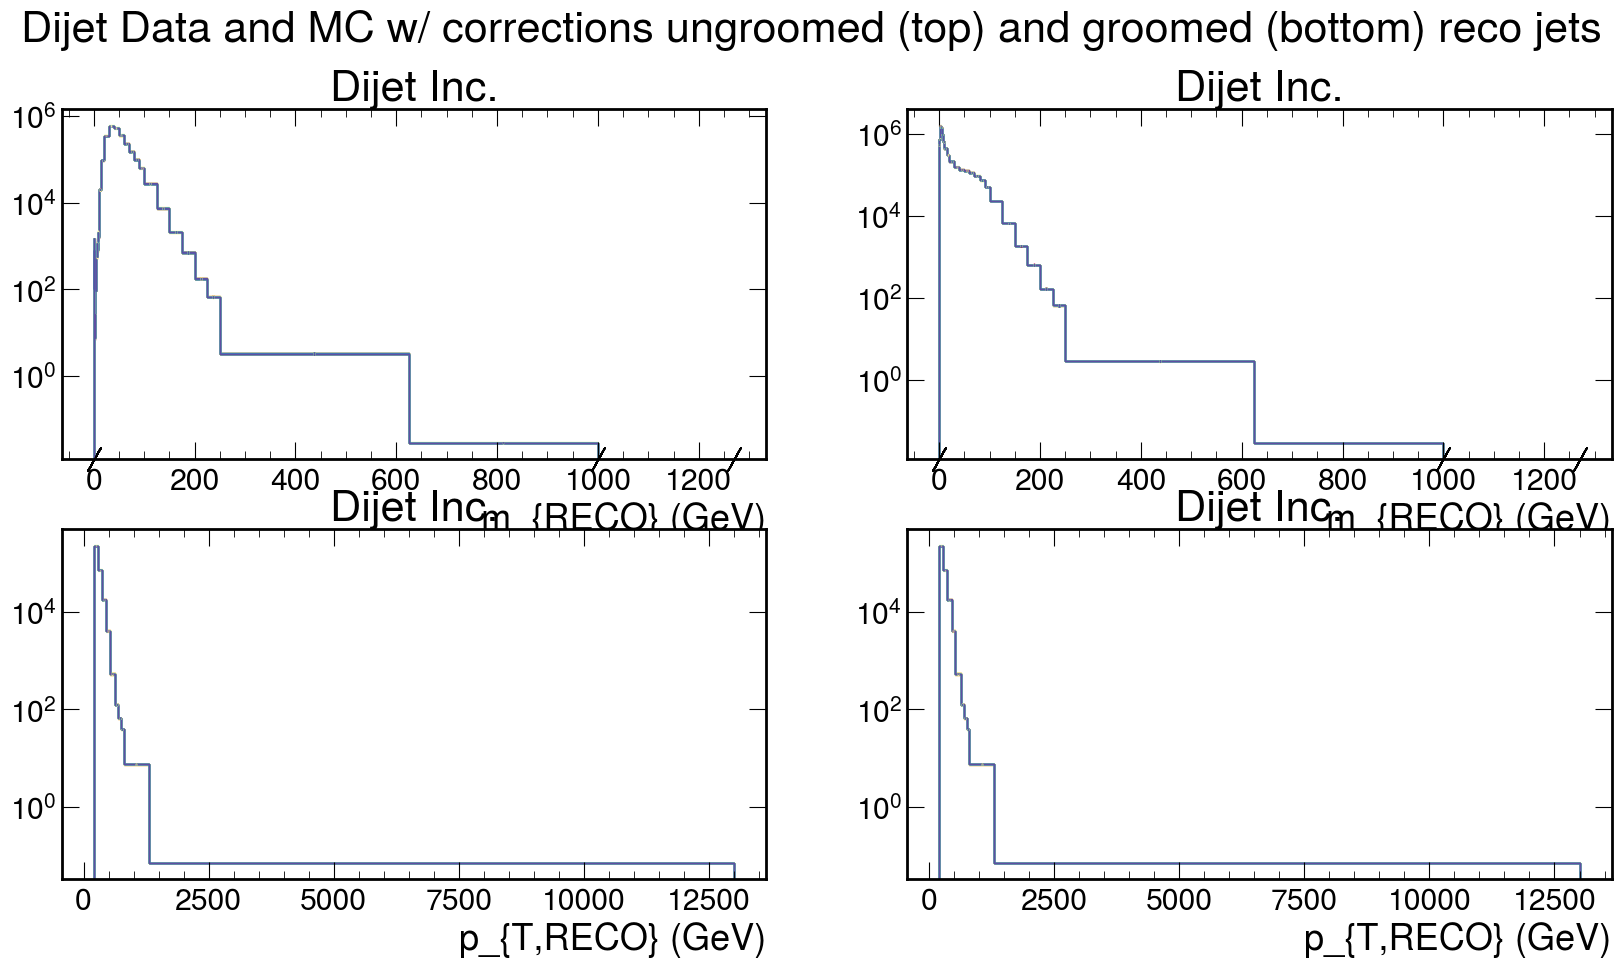

<Figure size 2000x1000 with 0 Axes>

In [7]:
plt.rcParams["figure.figsize"] = (20,10)
print("Hists in file: ", result_mc.keys())
hist = 'ptreco_mreco'

axis_names = [ax.name for ax in result_mc[hist+'_u'].axes]
print("Axes in pt mass reco hist: ", axis_names)
systcats = [cat for cat in result_mc['response_matrix_u'][{'ptreco':sum,'mreco':sum, 'ptgen':sum, 'ptgen':sum}].axes[0]]
pt_bins = [bin for bin in result_mc['response_matrix_u'].project("ptreco").axes[0]]
fig, axs = plt.subplots(2, 2)
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
colors2 = plt.cm.Spectral(np.linspace(0,1,60))
fig.suptitle('Dijet Data and MC w/ corrections ungroomed (top) and groomed (bottom) reco jets')
# mc_old = [result_mc_old[hist+'_u'][{'syst':'nominal'}].project('mreco'), 
#         result_mc_old[hist+'_g'][{'syst':'nominal'}].project('mreco'),
#        result_mc_old[hist+'_u'][{'syst':'nominal'}].project('ptreco'), 
#         result_mc_old[hist+'_g'][{'syst':'nominal'}].project('ptreco')]
# mc_older = [result_mc_older[hist+'_u'].project('mreco'), 
#         result_mc_older[hist+'_g'].project('mreco'),
#        result_mc_older[hist+'_u'].project('ptreco'), 
#         result_mc_older[hist+'_g'].project('ptreco')]
for i, ax in enumerate(axs.flatten()):
    ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,30)))
    # hep.histplot(mc_old[i], stack=False, histtype='errorbar', binwnorm=1,
    #          ax=ax, density=False, marker =["."], color = 'black',
    #          label=['Dijet Data'])
    # hep.histplot(mc_older[i], stack=False, histtype='errorbar', binwnorm=1,
    #          ax=ax, density=False, marker =["."], color = 'teal',
    #          label=['MC w/o xs scaling'])
    for k in range(len(systcats)):
        syst = systcats[k]
        if syst != "nominal":
            mc = [result_mc['response_matrix_u'][{'syst':syst}].project('mreco'), 
              result_mc['response_matrix_g'][{'syst':syst}].project('mreco'),
              result_mc['response_matrix_u'][{'syst':syst}].project('ptreco'), 
              result_mc['response_matrix_g'][{'syst':syst}].project('ptreco')]
            hep.histplot(mc[i], stack=False, histtype='step', binwnorm=1,
                 ax=ax, density=False, linestyle =["-"], linewidth=1,
                 label=['QCD sim '+syst])
    ax.set_title("Dijet Inc.")
    # ax.legend()
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,1].set_yscale('log')
plt.show()
plt.savefig(os_path+"/compareDataMC_wXSscaling_wcorrlog.png")

In [8]:
def plotSyst(result, histname, axVar, label, systematics=None, logy=True, IOV = '', channel=''):
    from cycler import cycler
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c', '#9F79EE']
    fill_opts = {
            'edgecolor': (0,0,0,0.3),
            'alpha': 0.8}
    error_opts = {
            'label': 'Stat. Unc.',
            'hatch': '///',
            'facecolor': 'none',
            'edgecolor': (0,0,0,.5),
            'linewidth': 0
        }
    data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': 'k',
            'elinewidth': 1,
        }
    fig_tot, (ax_tot, rax_tot) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
    if "pt" in axVar:
        rax_tot.set_xlim(0, 2000)
    ax_tot.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,30)))
    rax_tot.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,30)))
    availAxes = [ax.name for ax in result[histname].axes]
    availSysts = [ax for ax in result[histname].project("syst").axes[0]]
    print("Available axes: ", availAxes)
    print("Available systs ", availSysts)
    # fig.subplots_adjust(hspace=.1)
    mc = []
    edges = [bin[0] for bin in result[histname].project(axVar).axes[0]] + [result[histname].project(axVar).axes[0][-1][1]]
    xlim = edges[-1]
    if systematics == None:
        print("Plotting all systematics available")
        systematics = availSysts
    for i, syst in enumerate(systematics):
        lines = ["-", "-", "-"]
        cols = ['green', 'red', 'black']
        #### Set up ratio plot
        print(syst)
        # hep.histplot(result[histname][{'syst':syst}].project(axVar), stack=False, histtype='step', binwnorm=1, ax=ax_tot, density=False, color=colors[i], linestyle =lines[0], linewidth=1,label=syst)
        # hep.histplot(np.ones_like(result[histname][{"syst":syst,}].project(axVar).values()), edges, stack=False, histtype='step',ax=rax_tot, density=False, color = colors[i], linestyle ="--", linewidth=1)
        if (syst in availSysts) and ("nominal" in availSysts) and (syst[-2:]=="Up"):
            fig, (ax, rax) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
            ax.yaxis.get_minor_locator().set_params(numticks=999, subs=(.2, .4, .6, .8))
            ax.set_ylabel(r'Events', loc = 'top')
            if logy: 
                ax.set_yscale('log')
            syst = syst[:-2]
            ratio_D = np.ones_like(result[histname][{"syst":syst+"Up",}].project(axVar).values())
            ratio_U = np.ones_like(result[histname][{"syst":syst+"Up",}].project(axVar).values())
            #### Get mc hist
            # print("Up values: ", result[histname][{'syst':syst+"Up"}].project(axVar).values())
            if (syst+"Down") in availSysts:
                ratio_D = np.divide(result[histname][{'syst':syst+"Down"}].project(axVar).values(),result[histname][{"syst":"nominal"}].project(axVar).values(),
                                    out=np.empty(np.array(result[histname][{"syst":"nominal"}].project(axVar).values()).shape).fill(np.nan),
                                    where=result[histname][{"syst":"nominal"}].project(axVar).values()!= 0,)
                hep.histplot(ratio_D, edges, stack=True, histtype='step', ax=rax, density=False, linestyle ="-", color = 'red', linewidth=1)
                # print("Down values: ", result[histname][{'syst':syst+"Down"}].project(axVar).values())
                hep.histplot(ratio_D, edges, stack=True, histtype='step', ax=rax_tot, density=False, linestyle ="-", linewidth=1)
                hep.histplot(result[histname][{'syst':syst+"Down"}].project(axVar), stack=False, histtype='step', binwnorm=1, ax=ax, density=False, linestyle ='-', color = 'red', linewidth=1,label=syst+"Down")
                hep.histplot(result[histname][{'syst':syst+"Down"}].project(axVar), stack=False, histtype='step', binwnorm=1, ax=ax_tot, density=False, linestyle ='-', linewidth=1,label=syst+"Down")
            #### Fill ratio plot
            ax.set_xlabel(None)
            # print("Nom values: ", result[histname][{'syst':"nominal"}].project(axVar).values())
            ratio_U = np.divide(
                result[histname][{'syst':syst+"Up"}].project(axVar).values(),
                result[histname][{"syst":"nominal"}].project(axVar).values(),
                out=np.empty(np.array(result[histname][{"syst":"nominal"}].project(axVar).values()).shape).fill(np.nan),
                where=result[histname][{"syst":"nominal"}].project(axVar).values()!= 0,)
            # print("Up ratio values: ", ratio_U)
            # print("Up ratio values: ", ratio_D)
            hep.histplot(result[histname][{'syst':syst+"Up"}].project(axVar), stack=False, histtype='step', binwnorm=1, ax=ax, density=False, linestyle ='-', color = 'green', linewidth=1,label=syst+"Up")
            hep.histplot(result[histname][{'syst':syst+"Up"}].project(axVar), stack=False, histtype='step', binwnorm=1, ax=ax_tot, density=False, linestyle ='-', linewidth=1,label=syst+"Up")
            ax.autoscale(axis='x', tight=True)
            leg = ax.legend(loc='best', labelspacing=0.25)
            leg.set_visible(True)
            hep.histplot(ratio_U, edges, stack=False, histtype='step', ax=rax, density=False, linestyle ="-", color = 'green', linewidth=1)
            hep.histplot(ratio_U, edges, stack=False, histtype='step', ax=rax_tot, density=False, linestyle ="-", linewidth=1)
            #### plotting nominal values
            hep.histplot(np.ones_like(ratio_U), edges, stack=False, histtype='step',ax=rax, density=False, linestyle ="--", color = 'black', linewidth=1)
            hep.histplot(result[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=1, ax=ax, density=False, linestyle ='-', color = 'black', linewidth=1,label="nominal")
            hep.histplot(result[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=1, ax=ax_tot, density=False, linestyle ='-', color = 'black', linewidth=1,label="nominal")
            rax.set_ylabel(r'$\frac{Up/Down}{Nominal}$', loc = 'center')
            rax.set_ylim(0.9,1.1)
            rax_tot.set_ylabel(r'$\frac{Up/Down}{Nominal}$', loc = 'center')
            rax_tot.set_ylim(0.9,1.1)
            if ("eta" in axVar) | ("phi" in axVar):
                rax.set_xlim(-xlim, xlim)
            elif "pt" in axVar:
                rax.set_xlim(0, 2000)
            else:
                rax.set_xlim(0, xlim)
            cms = plt.text(0.04, 0.87, 'CMS $\it{Simulation}$',
                          fontsize=22,
                          fontfamily='sans',
                          fontweight='bold',
                          horizontalalignment='left',
                          verticalalignment='bottom',
                          transform=ax.transAxes
                         )
            lumi = plt.text(1., 1., label,
                        fontsize=16,
                        horizontalalignment='right',
                        verticalalignment='bottom',
                        transform=ax.transAxes
                       )
            fig.savefig("plots/syst/{}/UL{}{}_{}_{}_{}.png".format(IOV,IOV,channel, histname, axVar, syst), bbox_inches='tight') 
        elif syst in availSysts and "nominal" not in availSysts:
            fig, ax, = plt.subplots(nrows=1,ncols=1,figsize=(7,7))
            mc = [result[histname][{'syst':syst}].project(axVar),  result[histname][{'syst':syst}].project(axVar)]
            hep.histplot(mc, stack=False, histtype='step', binwnorm=1, ax=ax, density=False, linestyle =lines, color = cols, linewidth=1,label=syst)
            fig.savefig("plots/syst/{}/UL{}_{}_{}_{}.png".format(IOV,IOV,channel, histname, axVar, syst), bbox_inches='tight')
        elif (syst in availSysts) and ("nominal" in availSysts) and (syst[-4:]=="Down"):
            print("Down -- plot both variations for up")
        else:
            print("Systematic not in desired hist")
        ax_tot.set_ylabel(r'Events', loc = 'top')
        # leg_tot = ax_tot.legend(loc='best', labelspacing=0.25)
        # add some labels
        fig_tot.savefig("plots/syst/{}/UL{}{}_{}_{}_allSyst.png".format(IOV,IOV,channel, histname, axVar), bbox_inches='tight')   

Available axes:  ['syst', 'ptreco', 'mreco', 'ptgen', 'mgen']
Available systs  ['nominal', 'PUSFDown', 'L1prefiringUp', 'PUSFUp', 'L1prefiringDown', 'jerUp', 'jerDown', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown', 'RelativePtBBUp', 'RelativePtBBDown', 'RelativePtEC1Up', 'RelativePtEC1Down', 'RelativePtEC2Up', 'RelativePtEC2Down', 'RelativePtHFUp', 'RelativePtHFDown', 'RelativeBalUp', 'RelativeBalDown', 'RelativeSampleUp', 'RelativeSampleDown', 'RelativeStatECUp', 'Relative

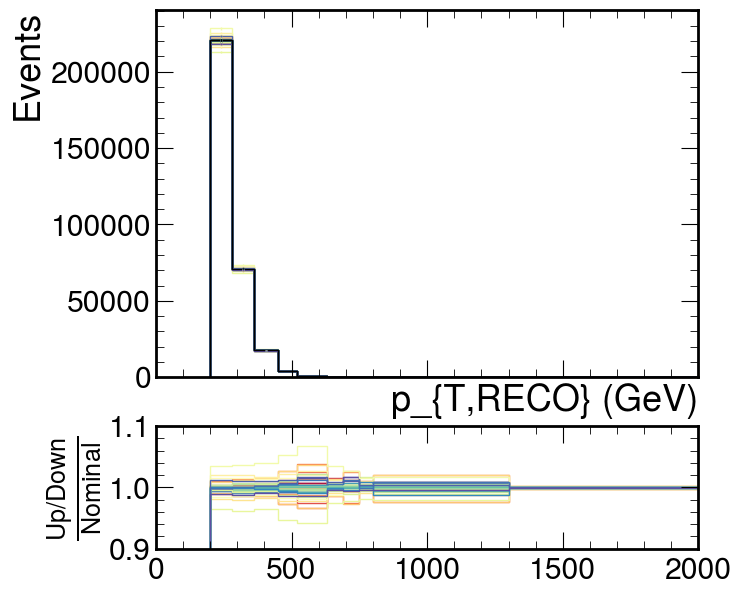

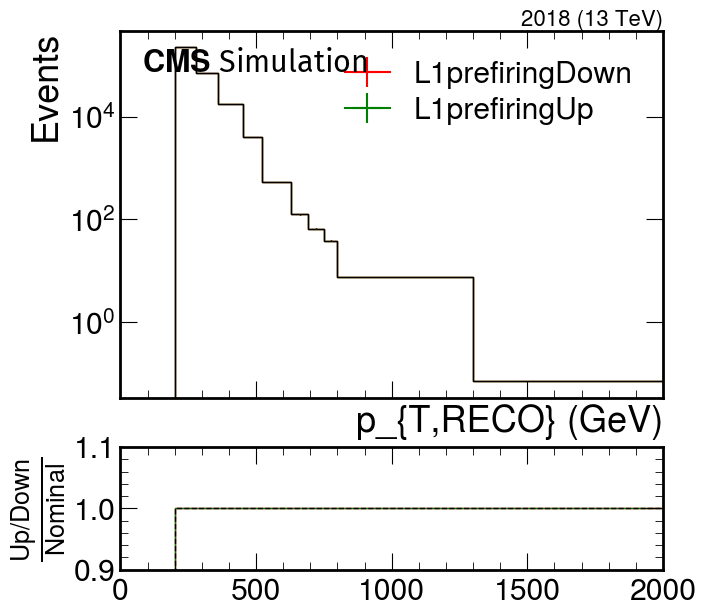

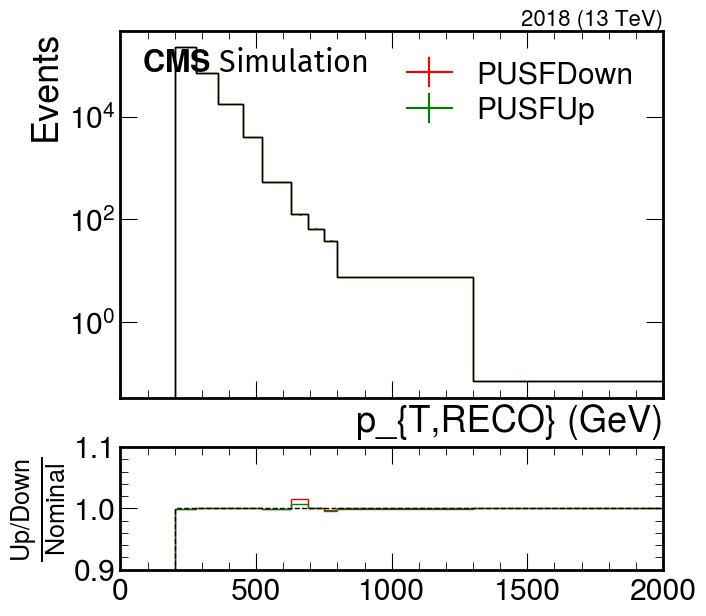

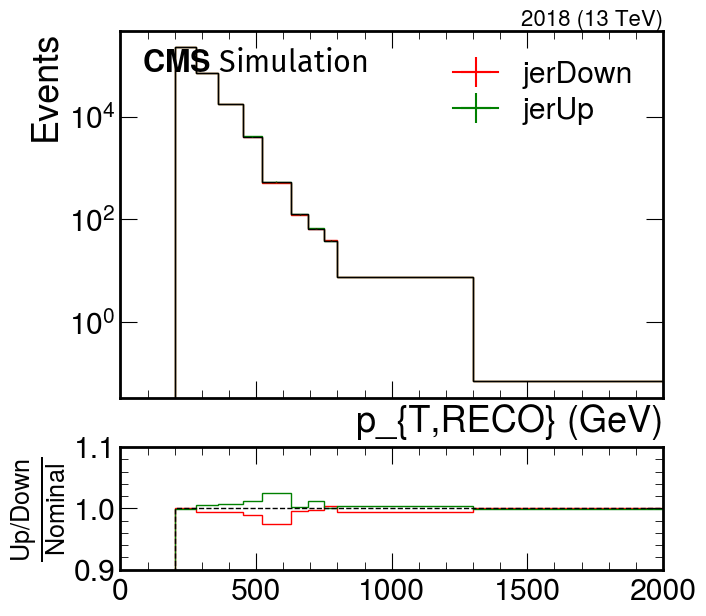

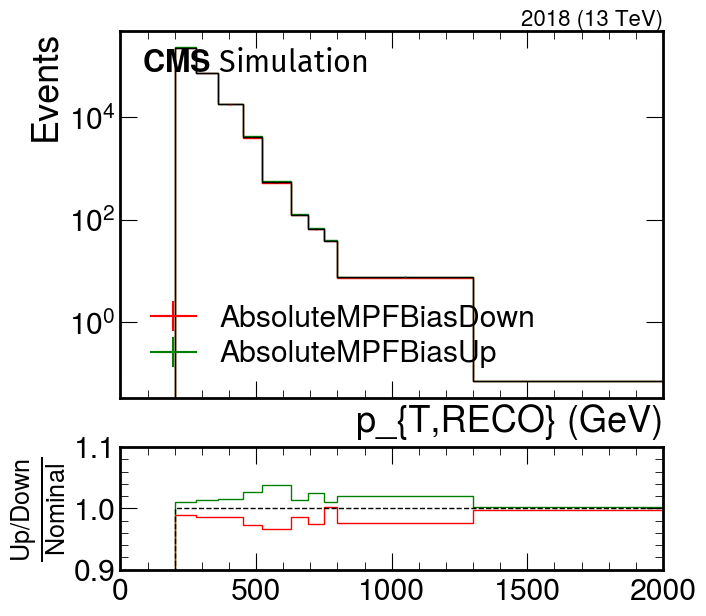

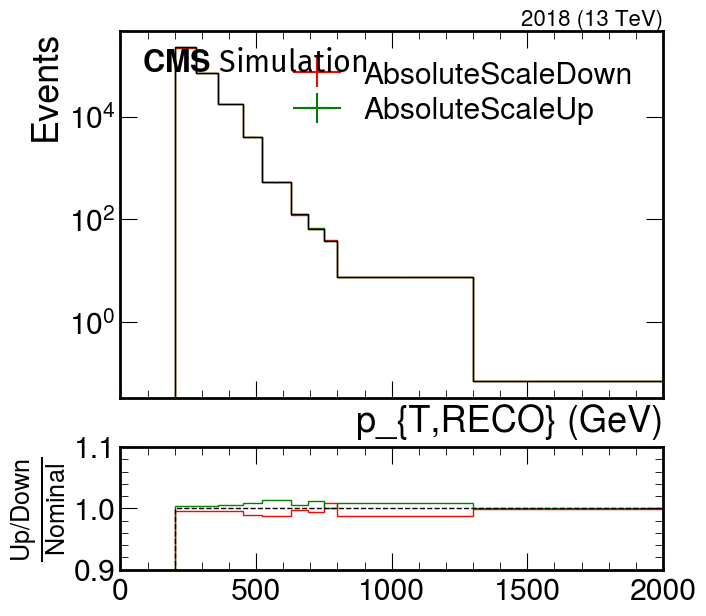

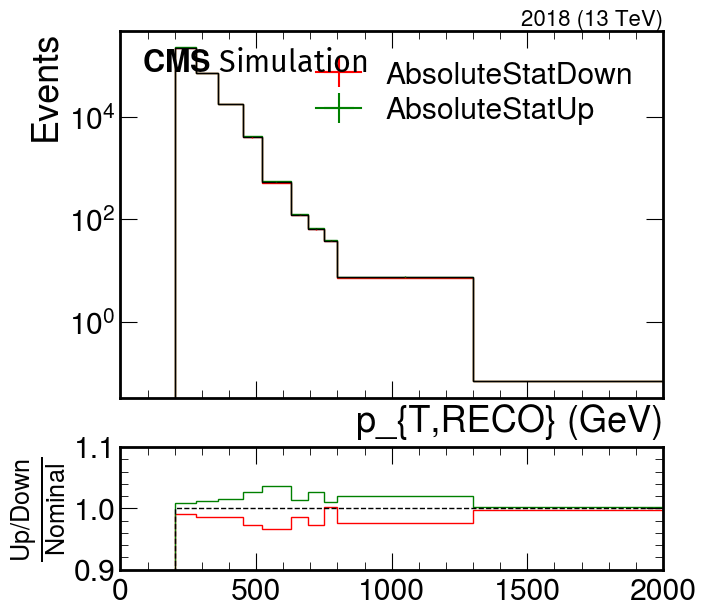

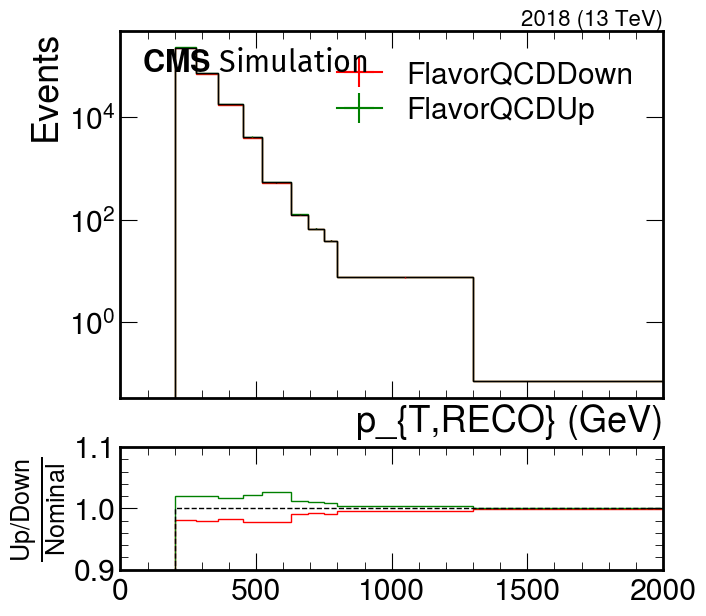

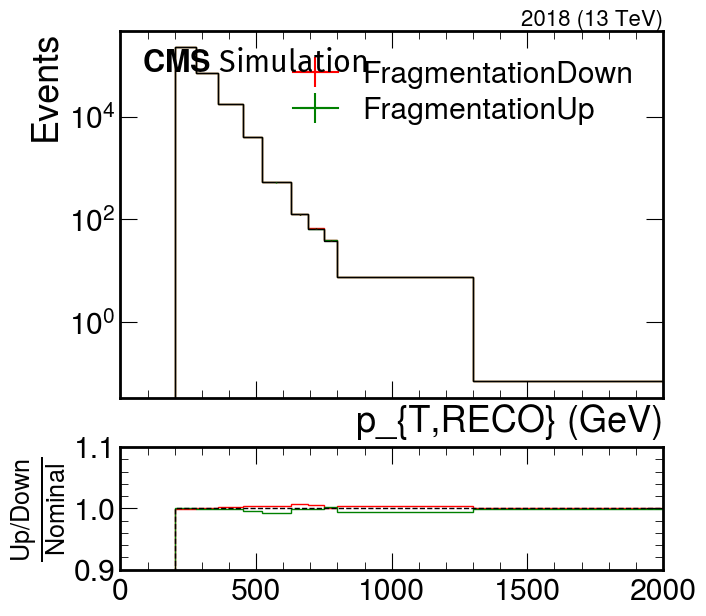

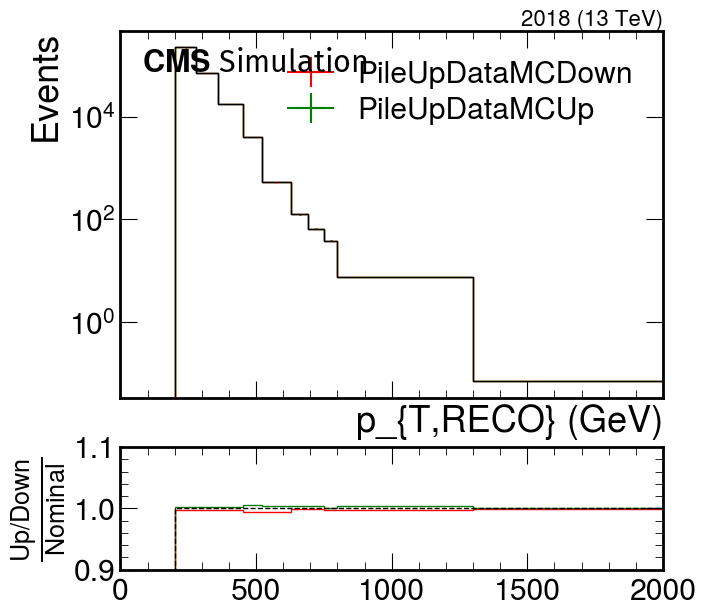

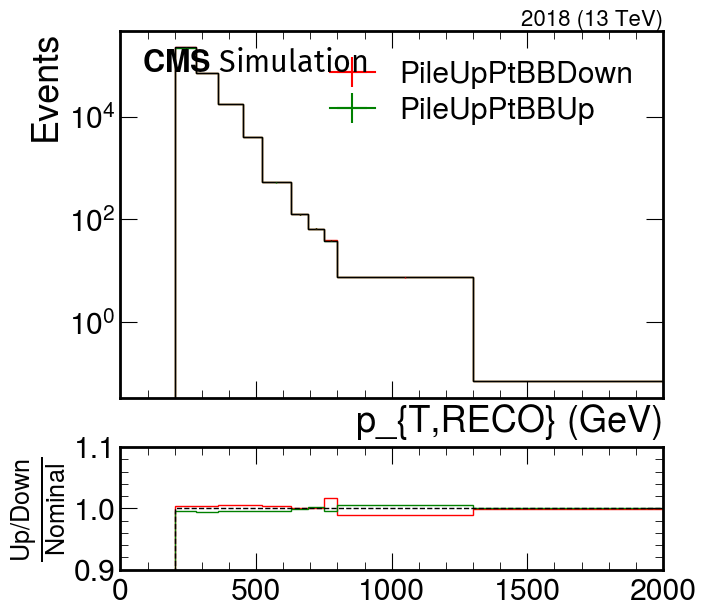

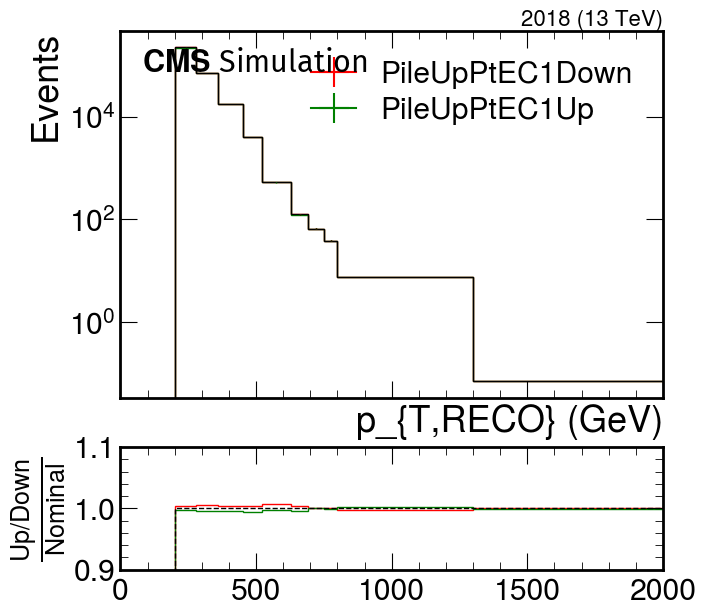

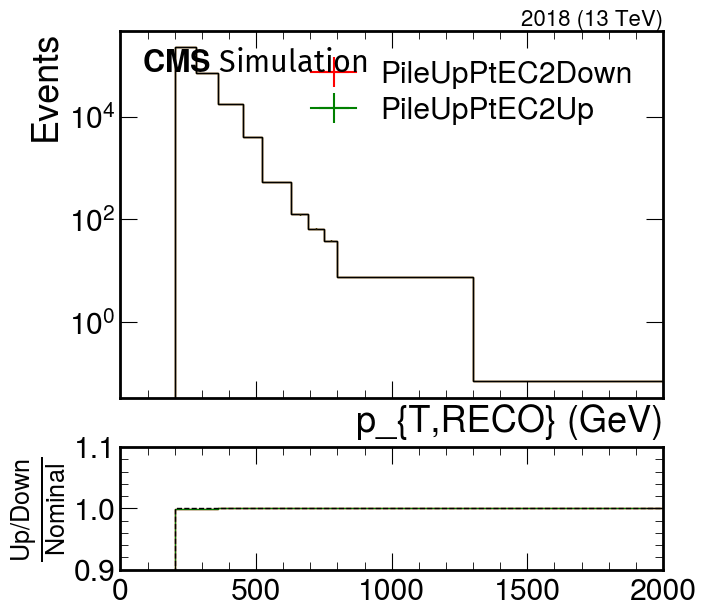

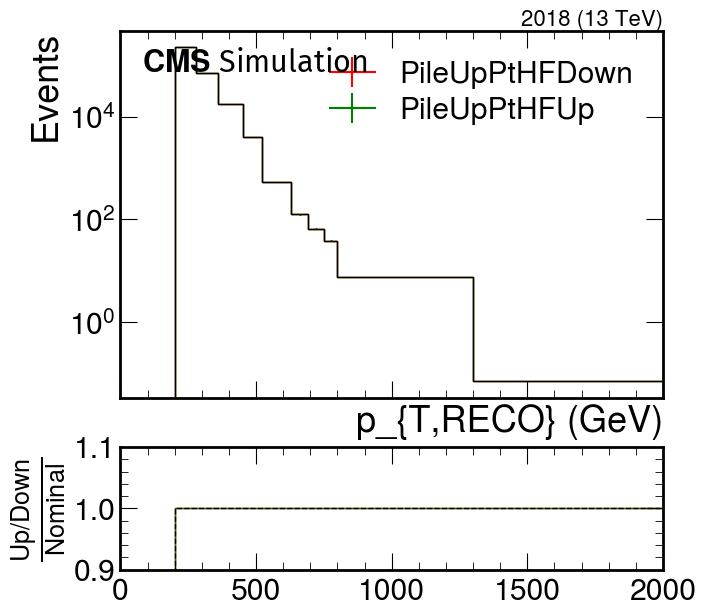

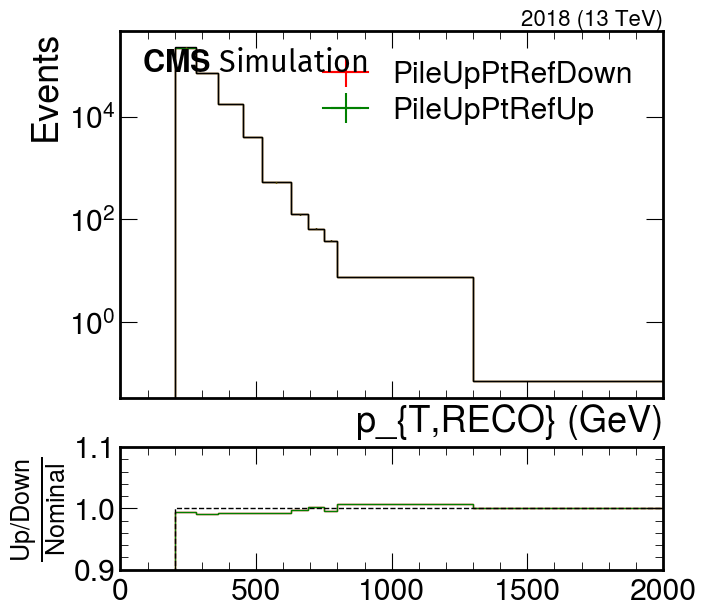

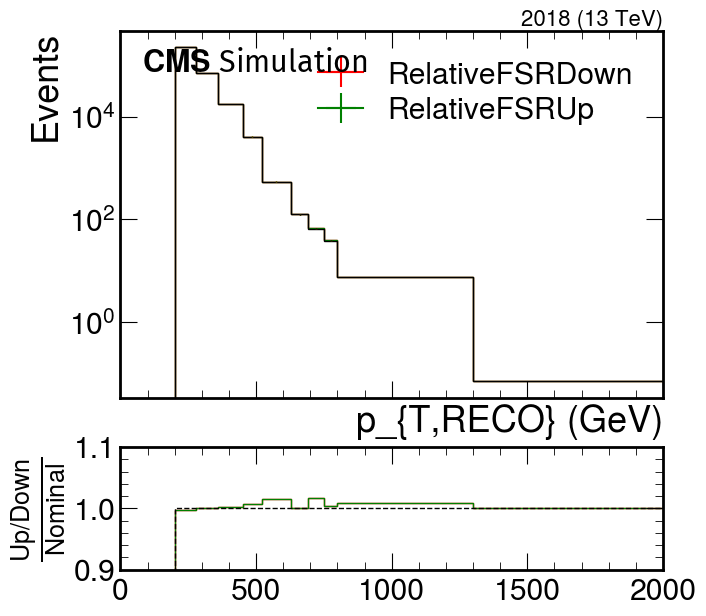

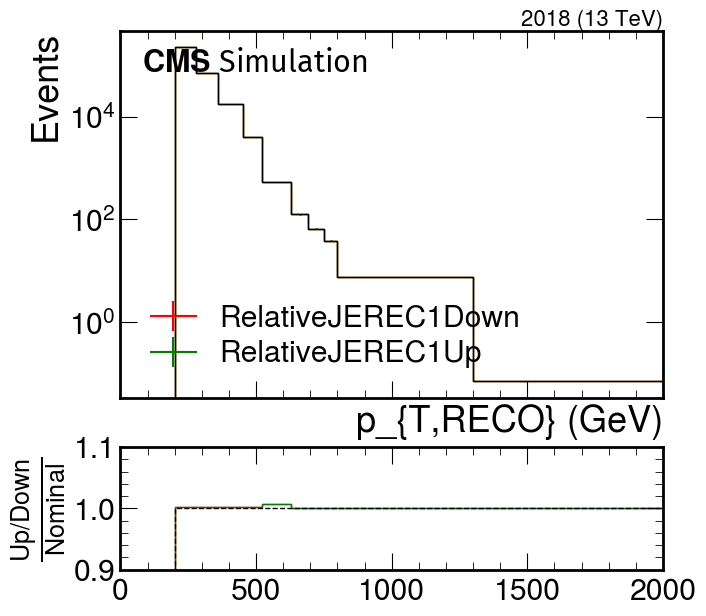

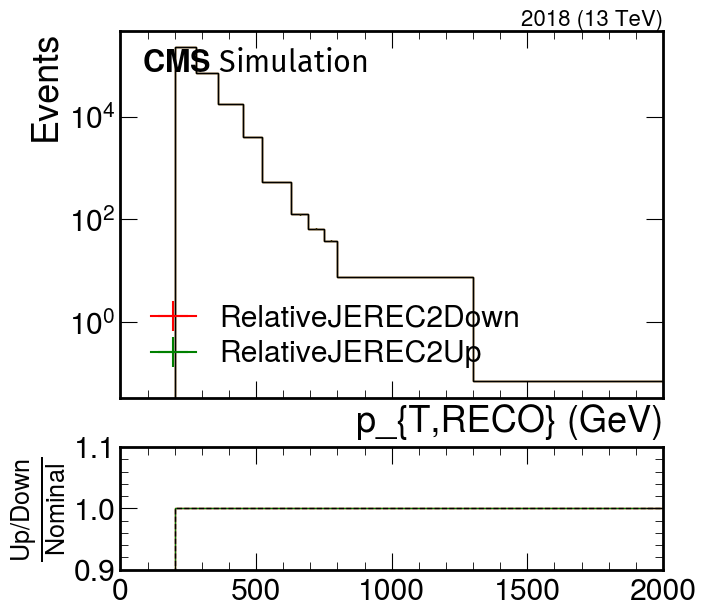

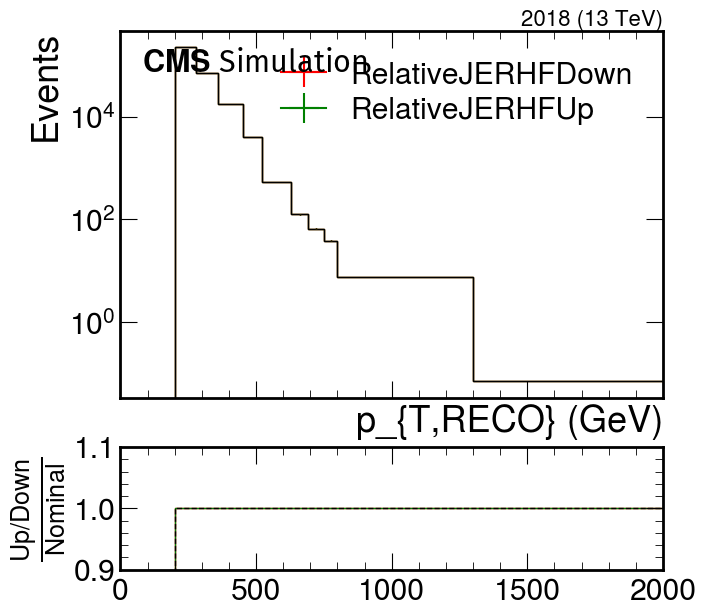

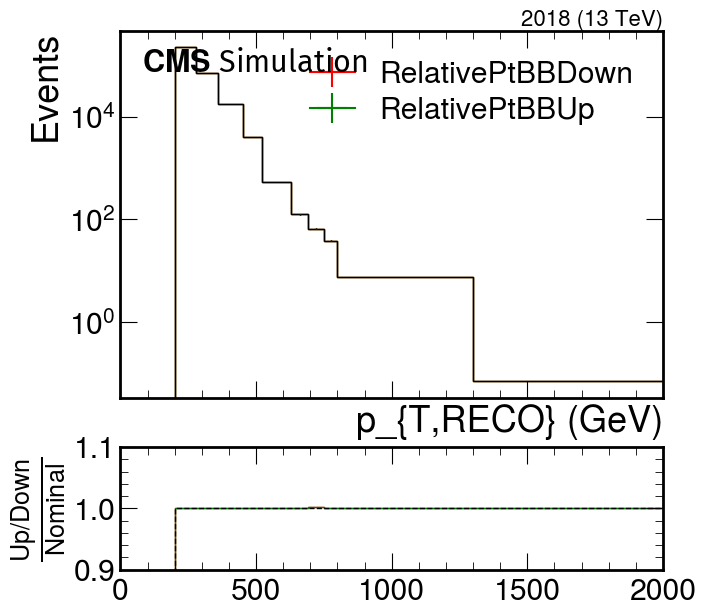

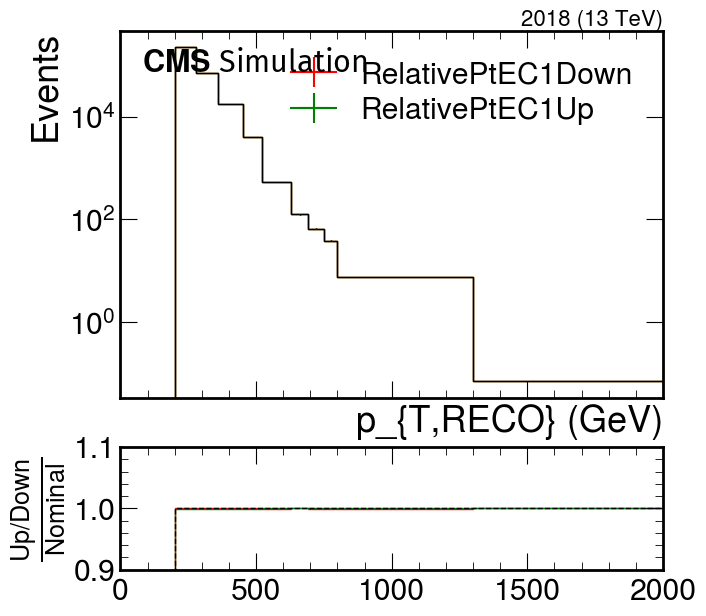

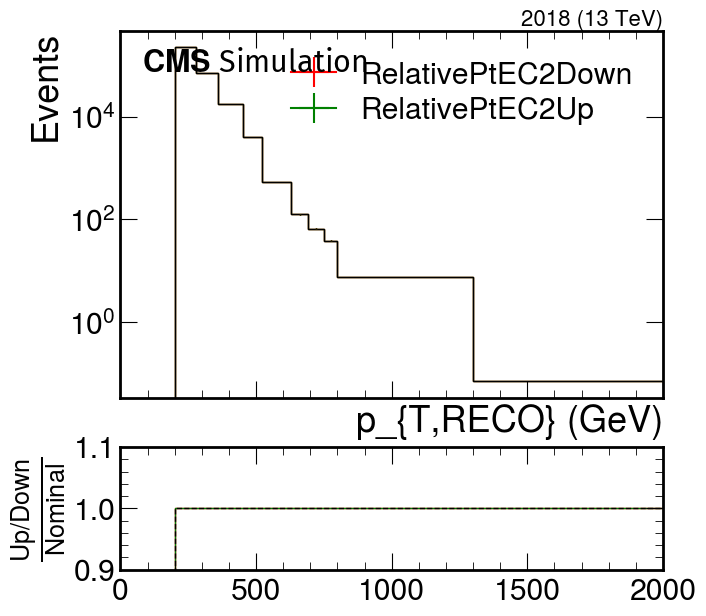

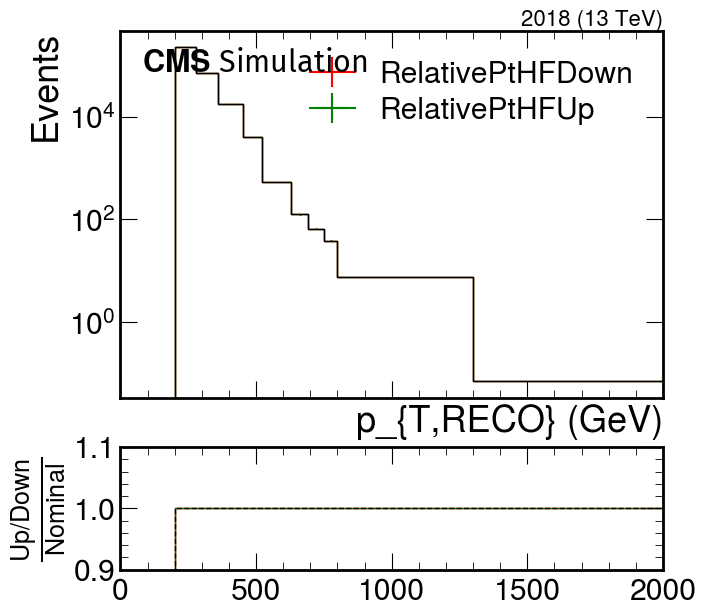

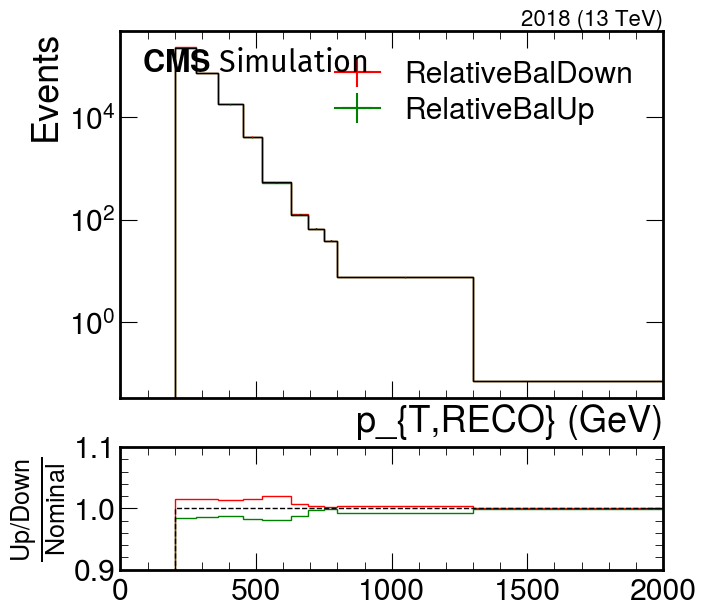

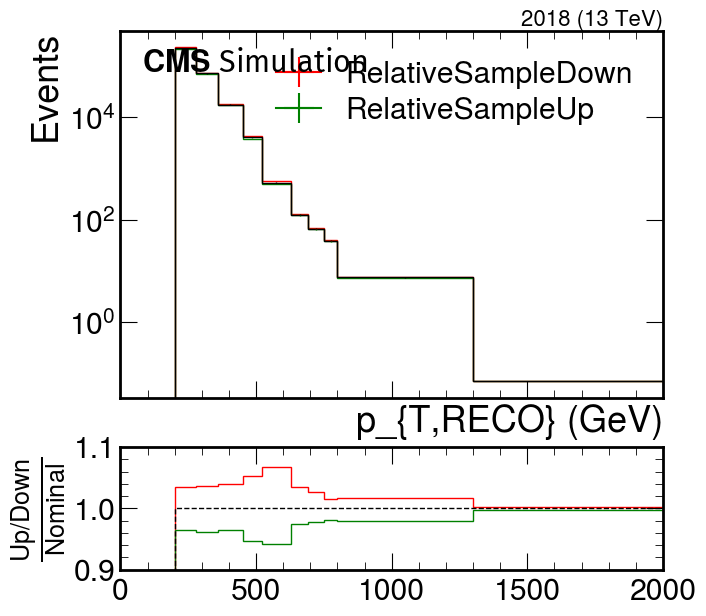

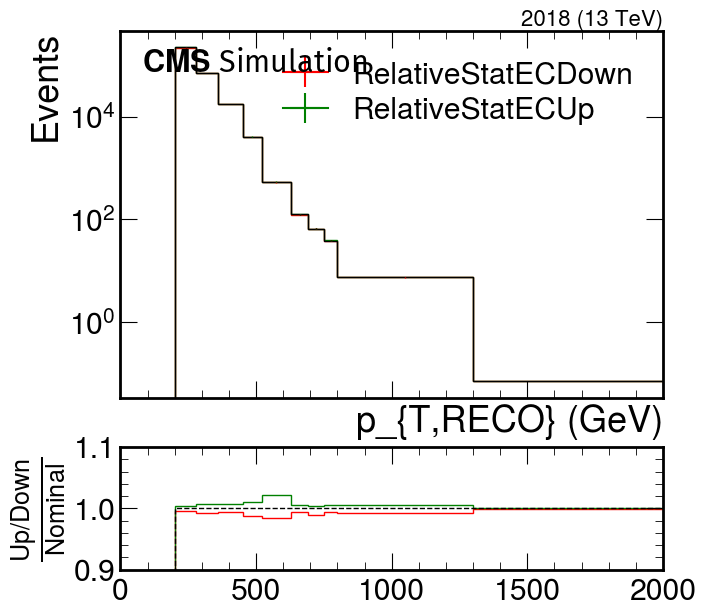

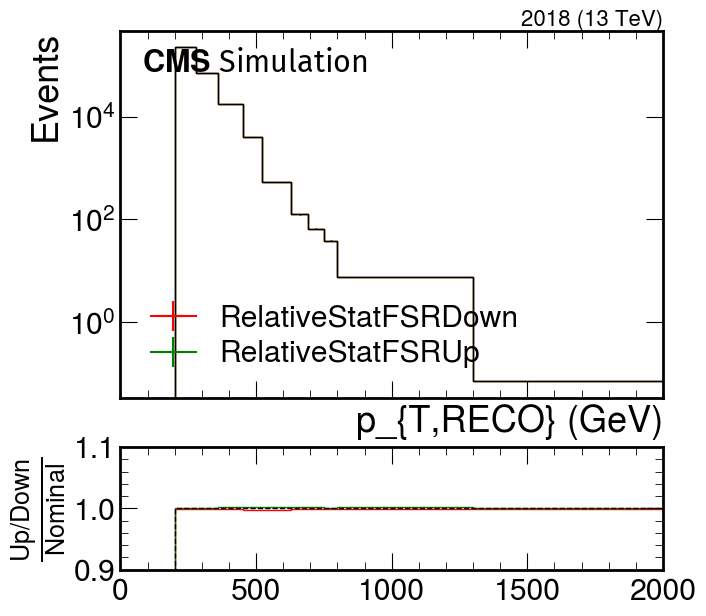

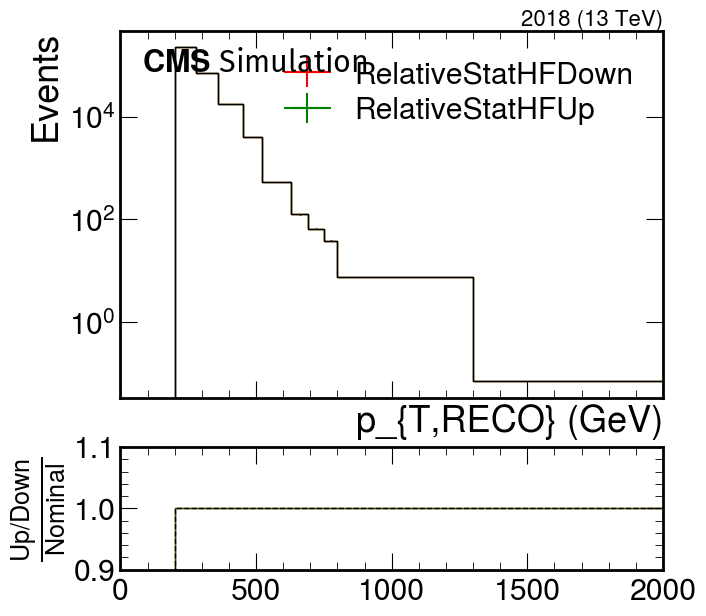

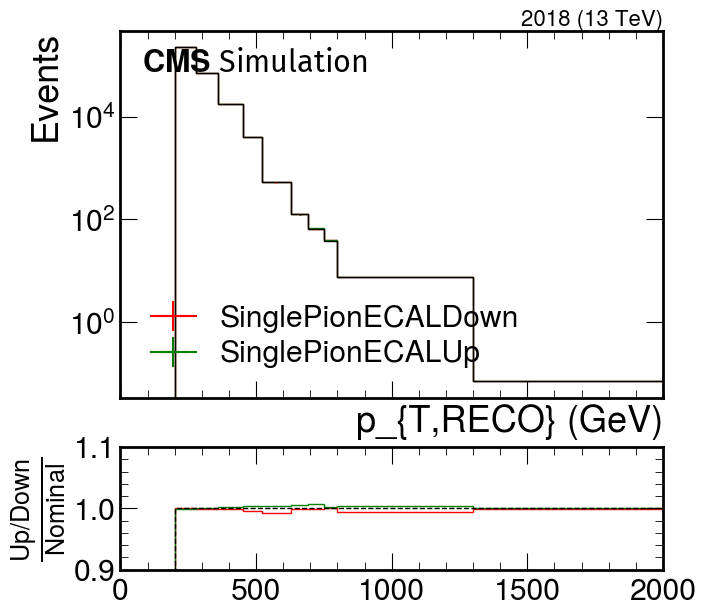

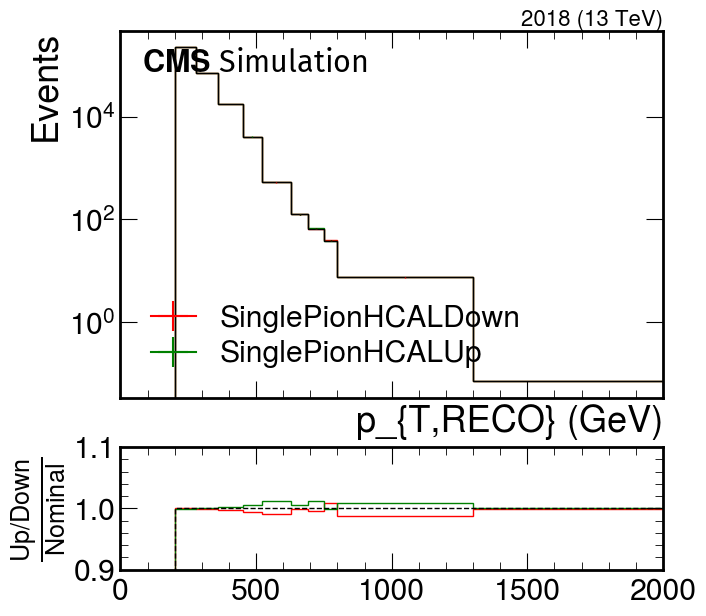

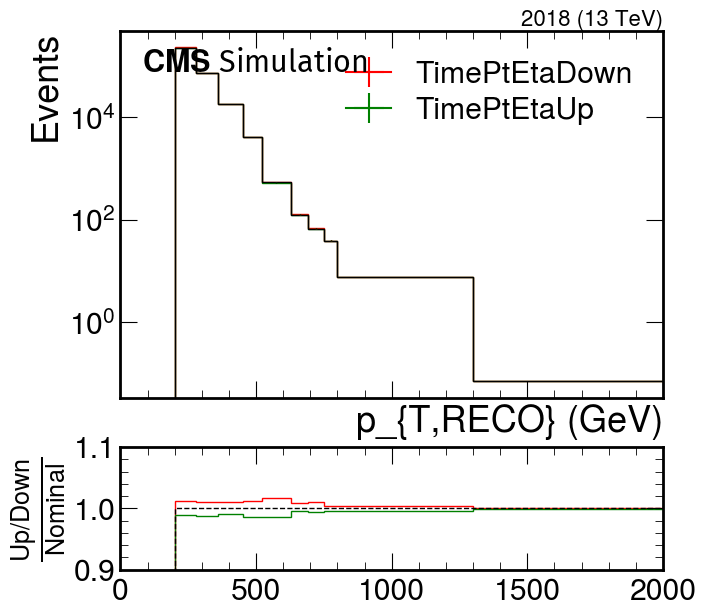

In [9]:
plotSyst(result_mc, "response_matrix_u", 'ptreco', label = r'2018 (13 TeV)', IOV='2018', channel='dijet')

Available axes:  ['syst', 'ptreco', 'mreco', 'ptgen', 'mgen']
Available systs  ['nominal', 'PUSFDown', 'L1prefiringUp', 'PUSFUp', 'L1prefiringDown', 'jerUp', 'jerDown', 'AbsoluteMPFBiasUp', 'AbsoluteMPFBiasDown', 'AbsoluteScaleUp', 'AbsoluteScaleDown', 'AbsoluteStatUp', 'AbsoluteStatDown', 'FlavorQCDUp', 'FlavorQCDDown', 'FragmentationUp', 'FragmentationDown', 'PileUpDataMCUp', 'PileUpDataMCDown', 'PileUpPtBBUp', 'PileUpPtBBDown', 'PileUpPtEC1Up', 'PileUpPtEC1Down', 'PileUpPtEC2Up', 'PileUpPtEC2Down', 'PileUpPtHFUp', 'PileUpPtHFDown', 'PileUpPtRefUp', 'PileUpPtRefDown', 'RelativeFSRUp', 'RelativeFSRDown', 'RelativeJEREC1Up', 'RelativeJEREC1Down', 'RelativeJEREC2Up', 'RelativeJEREC2Down', 'RelativeJERHFUp', 'RelativeJERHFDown', 'RelativePtBBUp', 'RelativePtBBDown', 'RelativePtEC1Up', 'RelativePtEC1Down', 'RelativePtEC2Up', 'RelativePtEC2Down', 'RelativePtHFUp', 'RelativePtHFDown', 'RelativeBalUp', 'RelativeBalDown', 'RelativeSampleUp', 'RelativeSampleDown', 'RelativeStatECUp', 'Relative

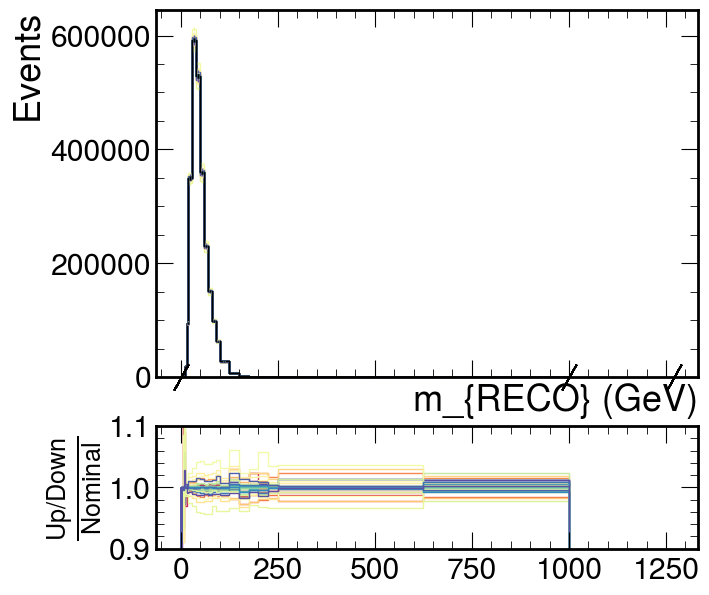

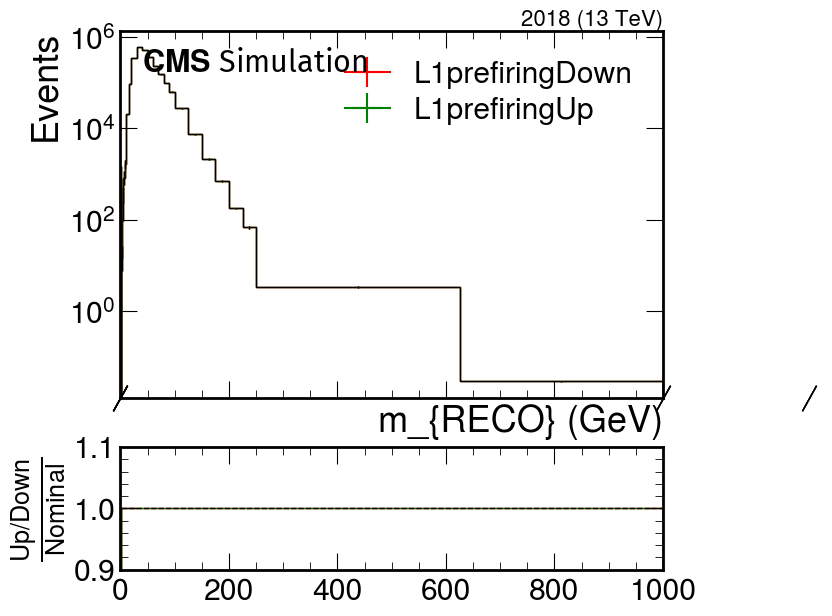

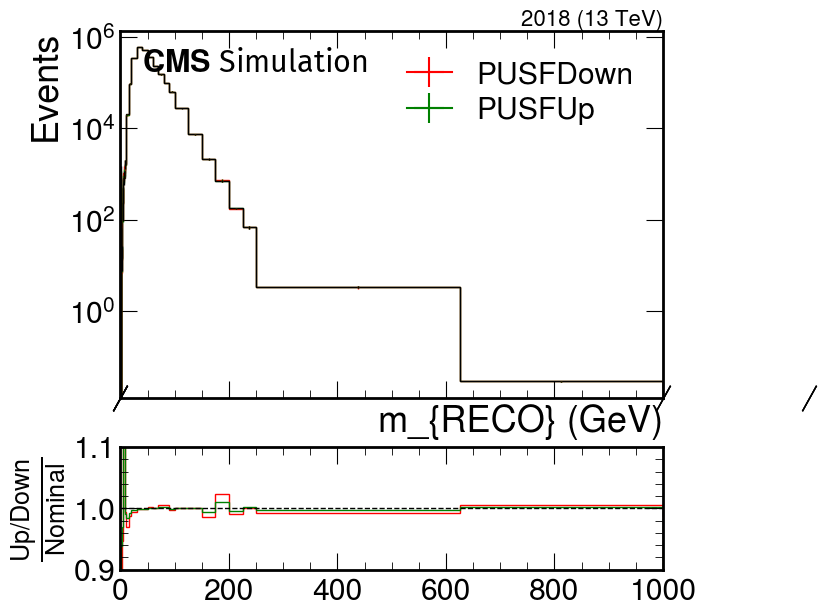

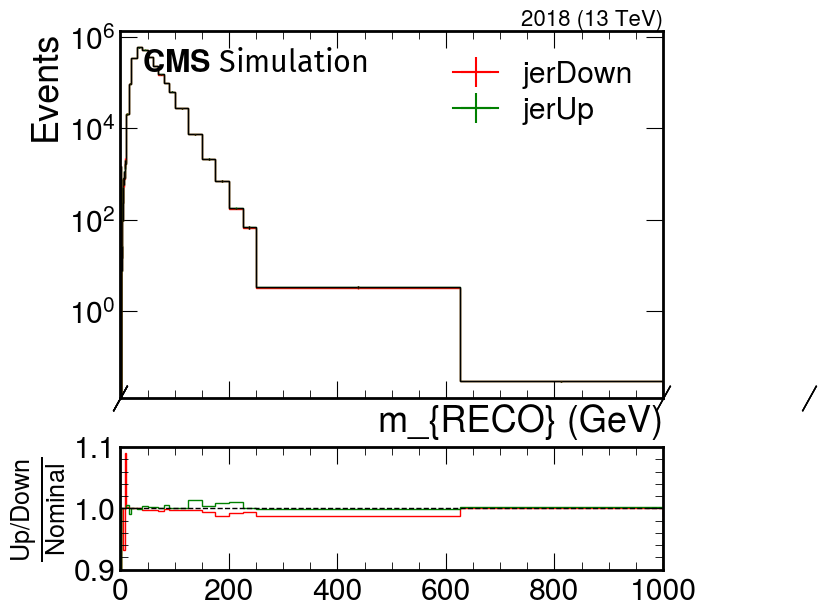

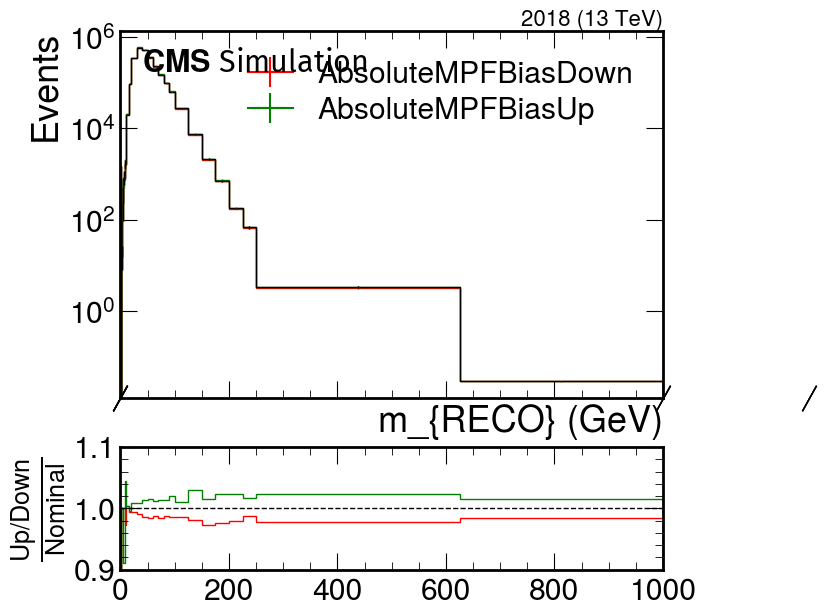

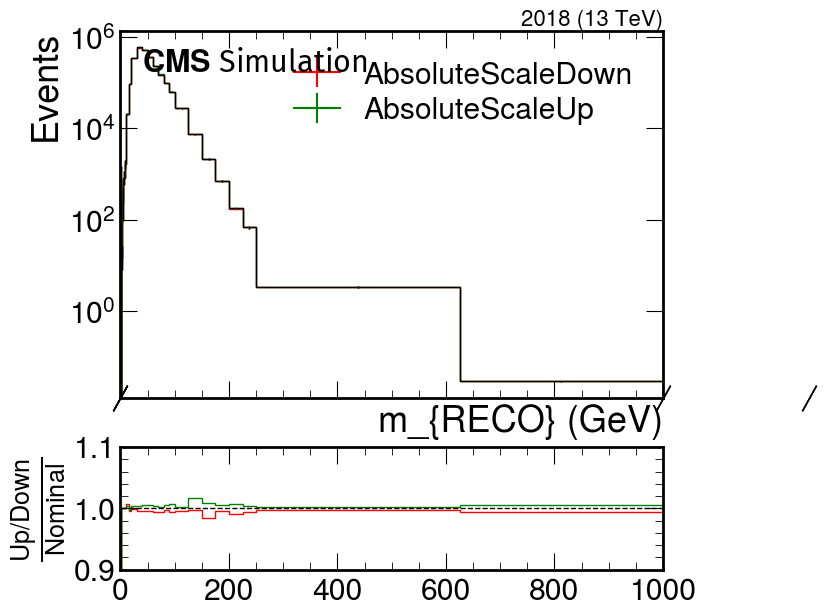

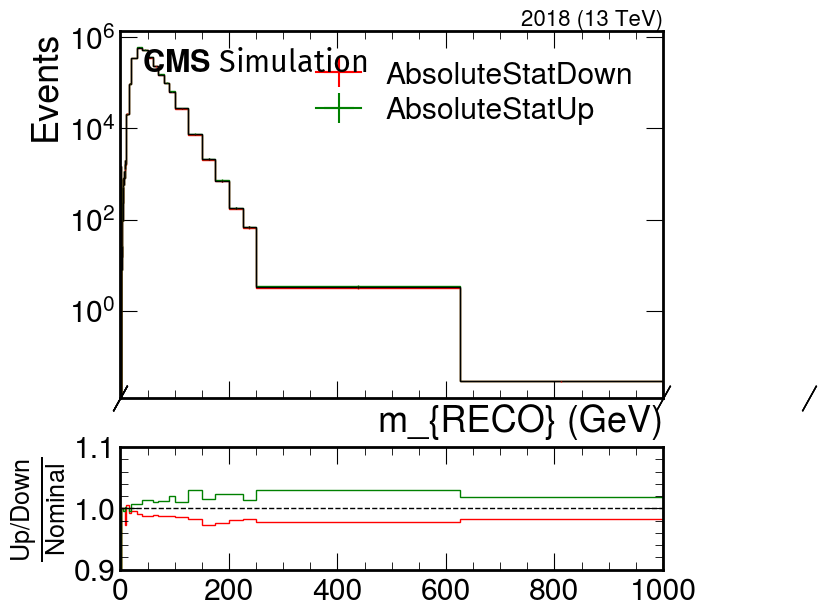

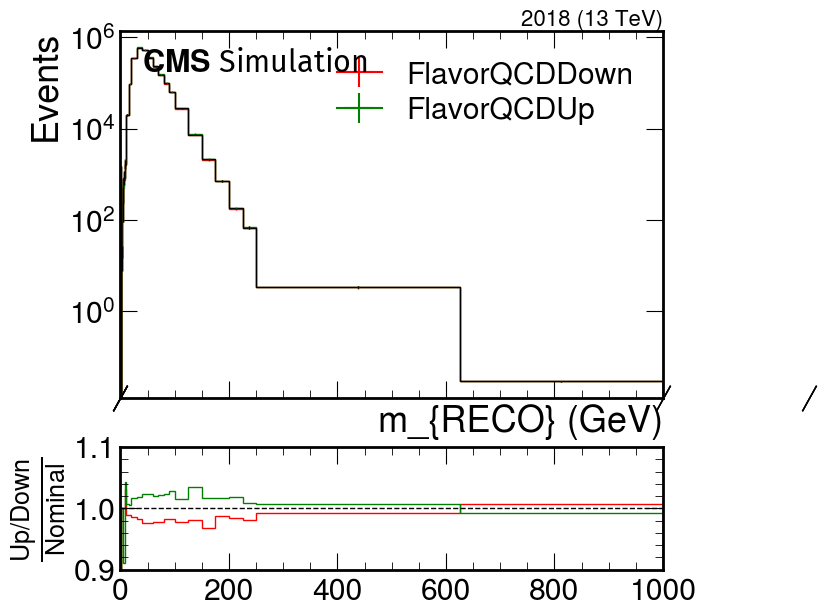

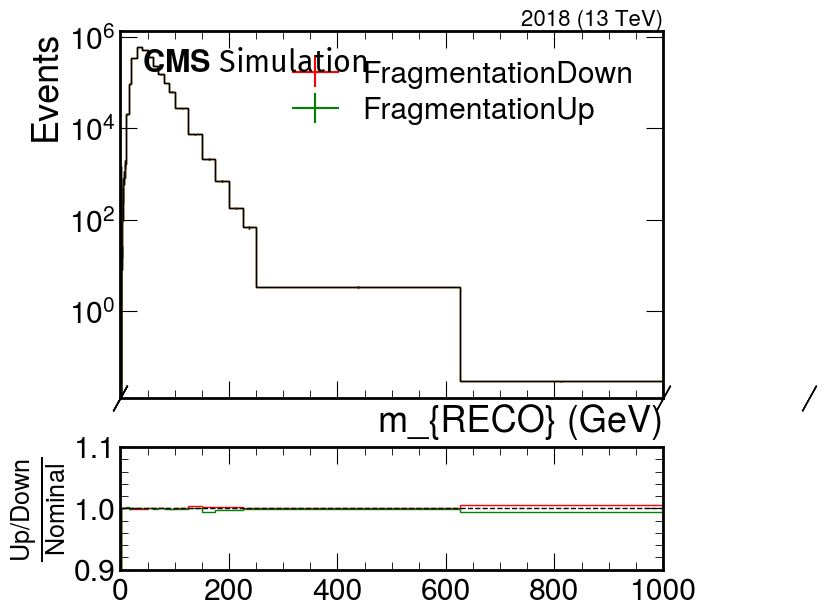

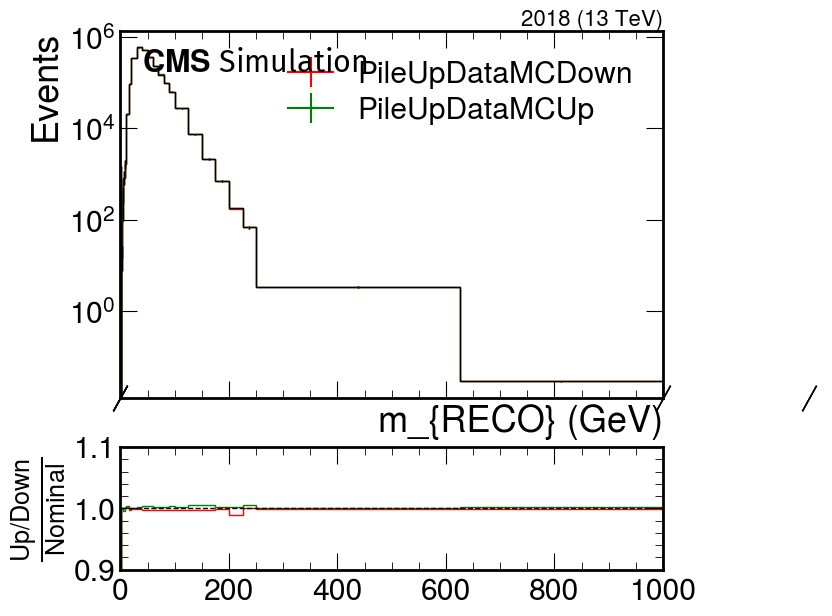

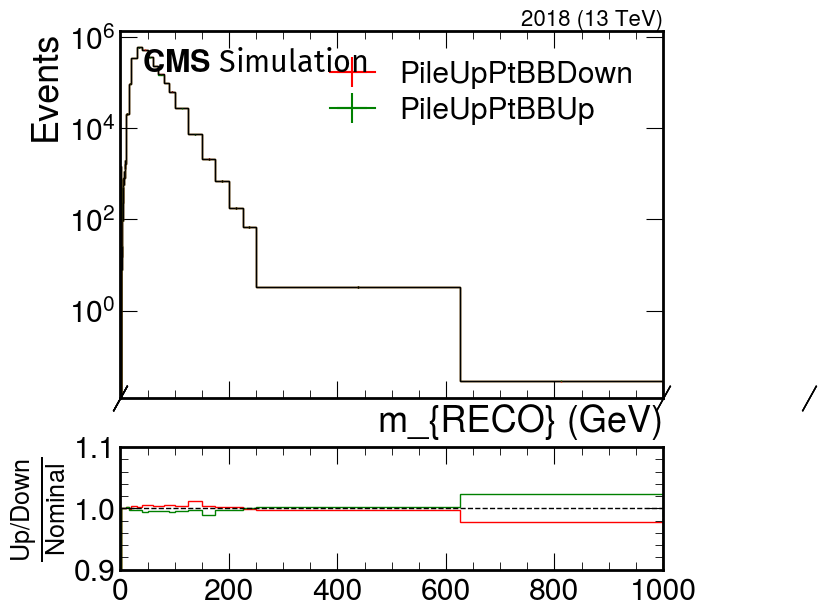

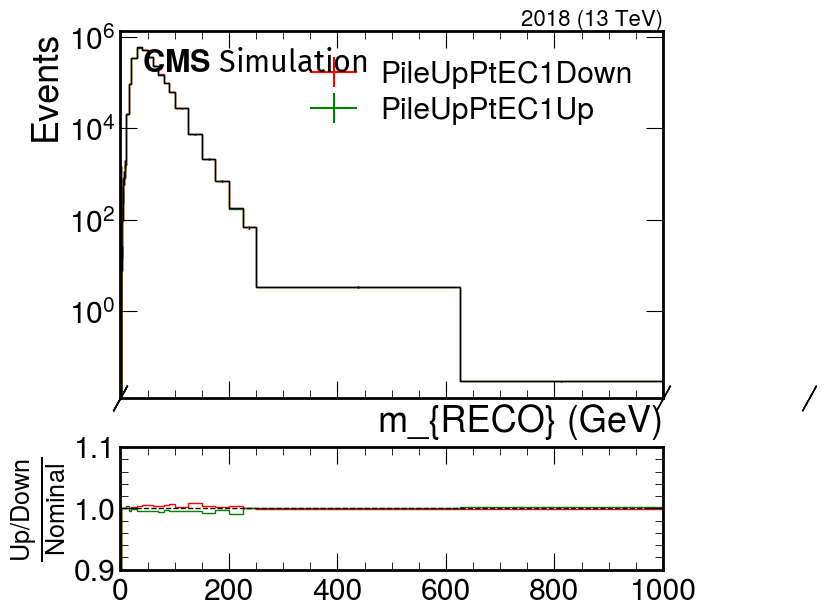

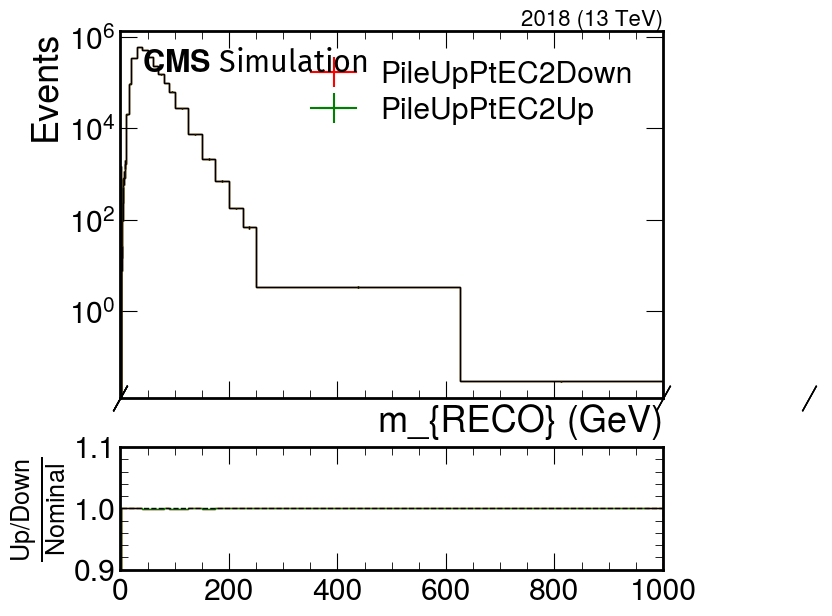

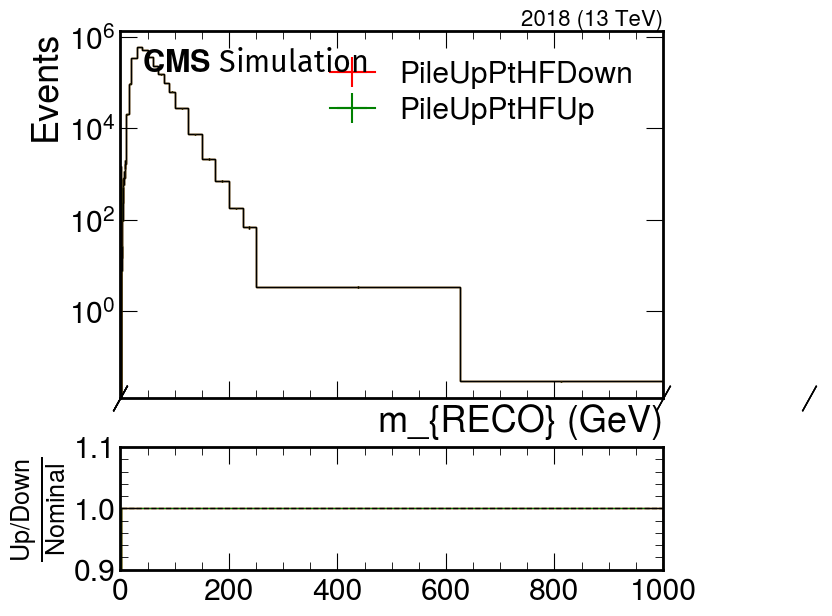

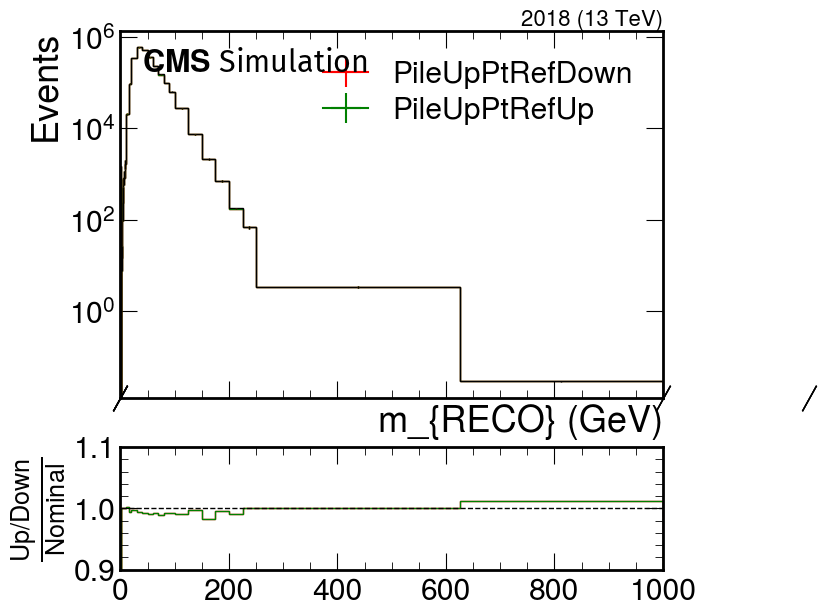

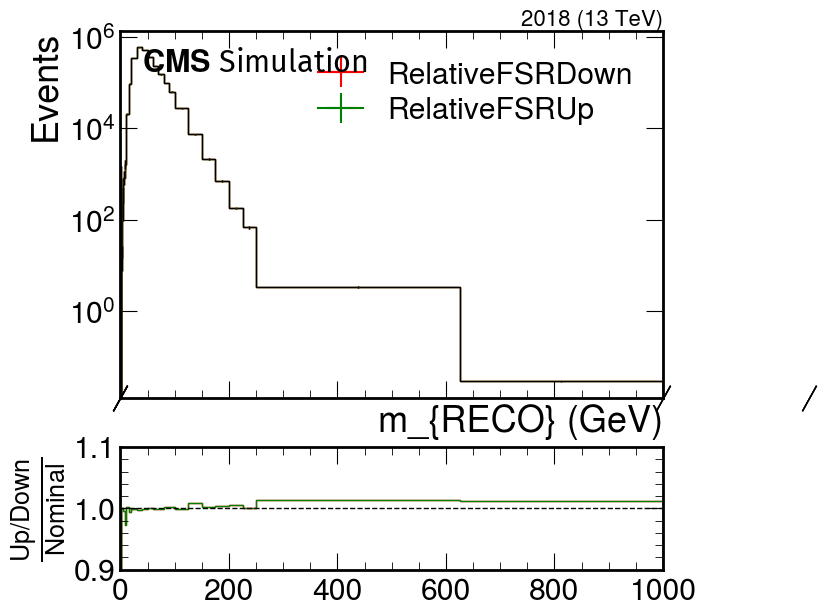

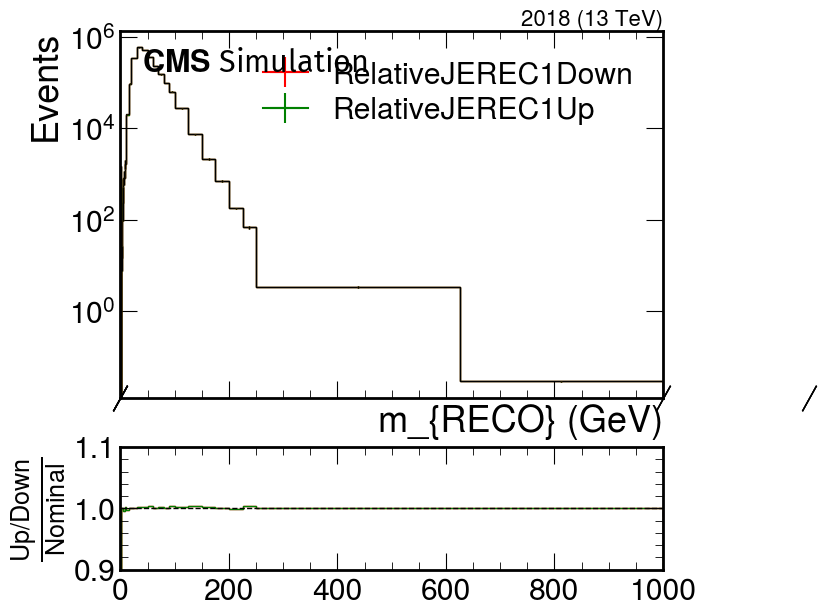

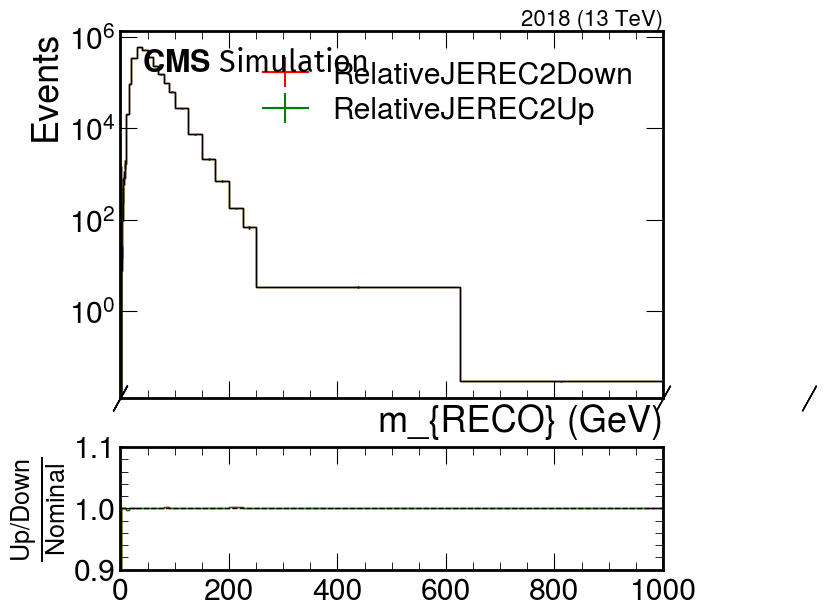

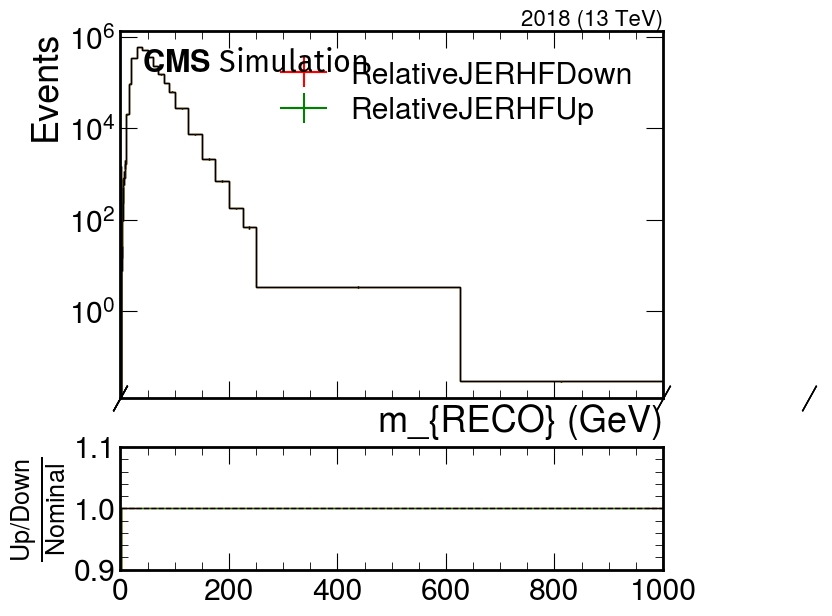

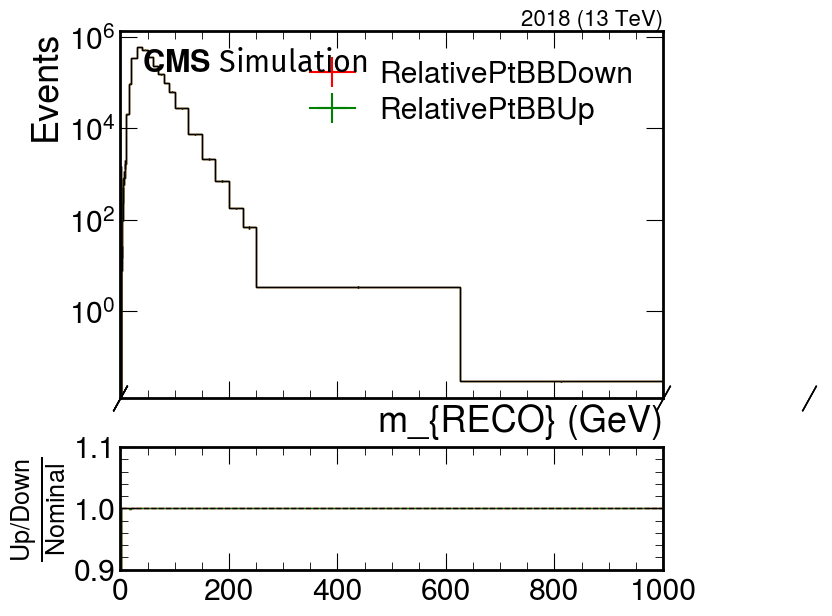

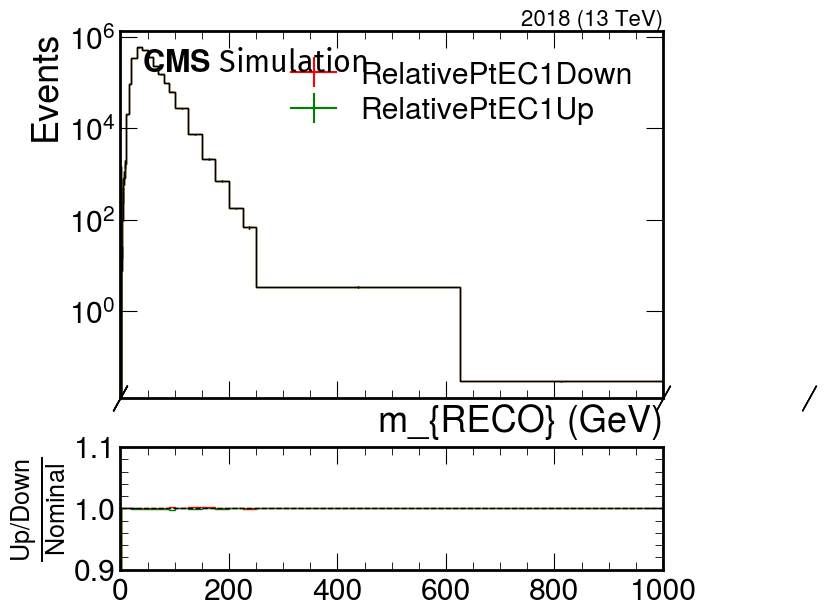

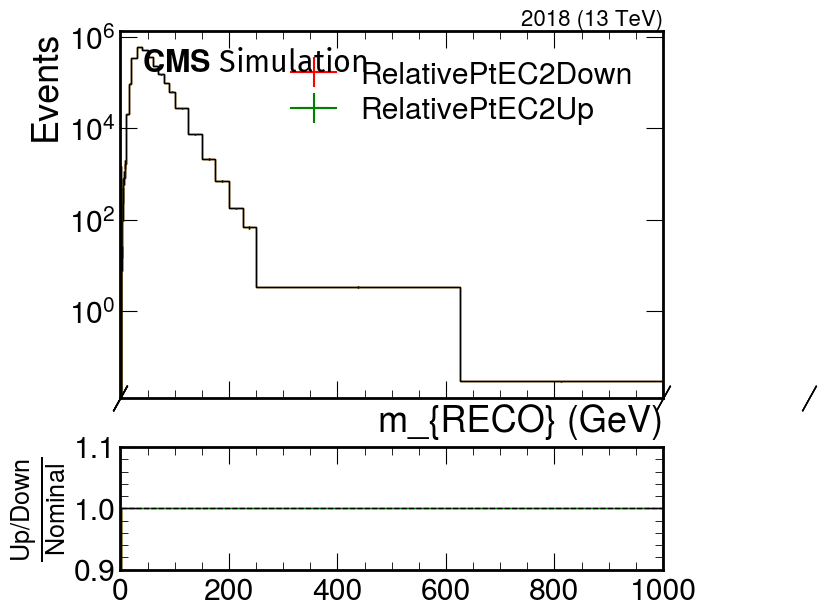

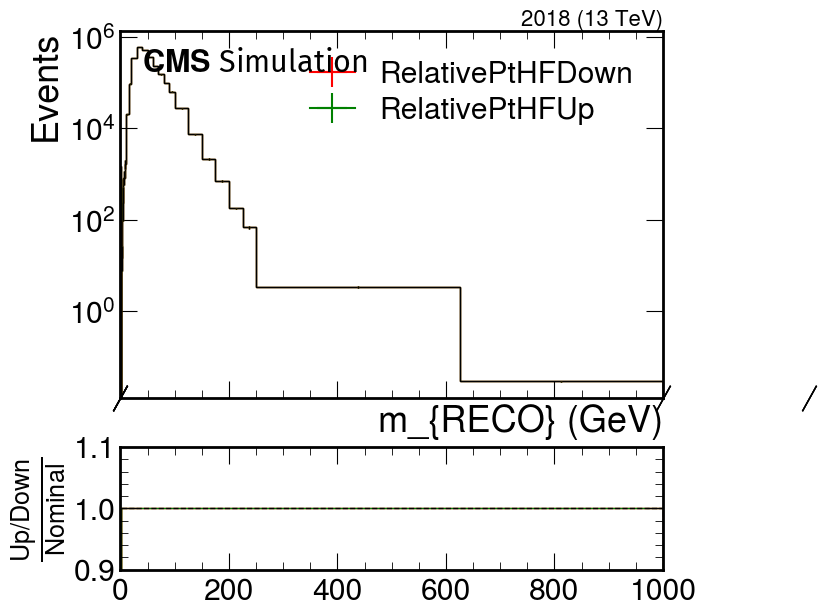

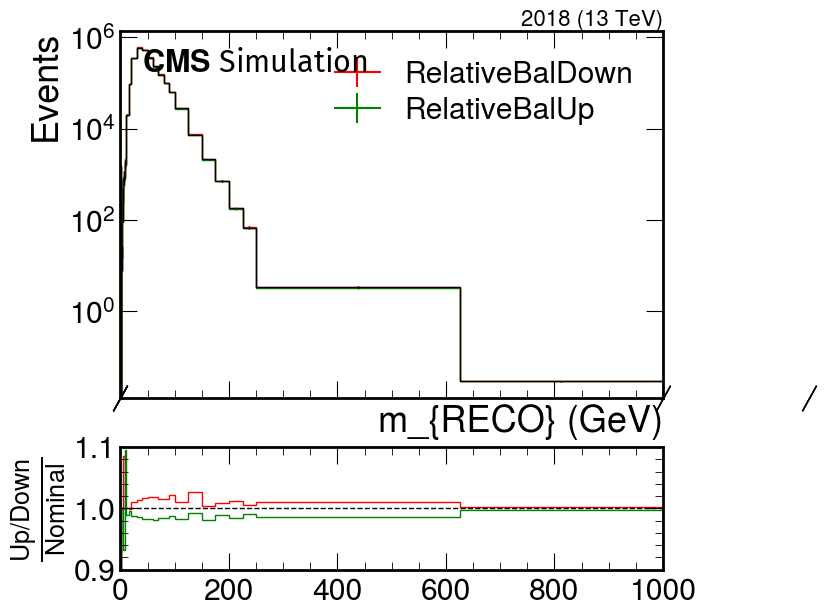

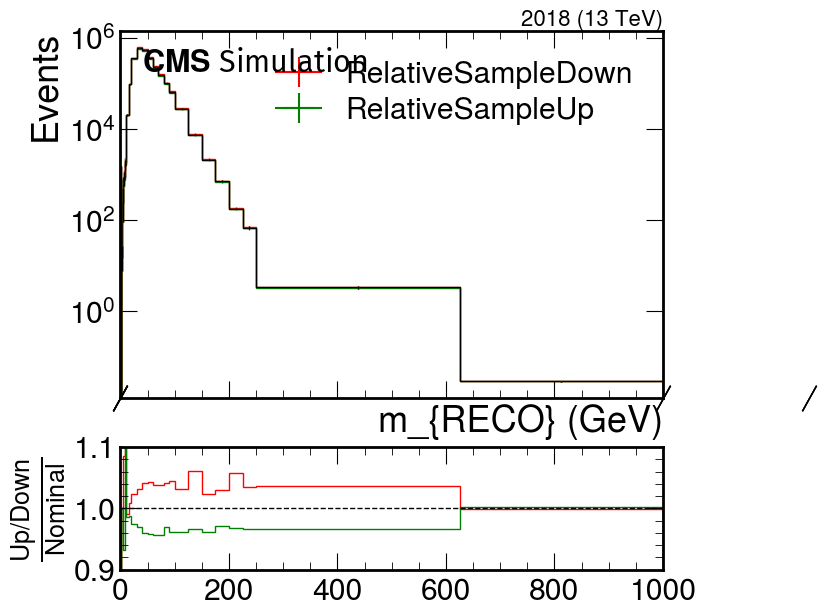

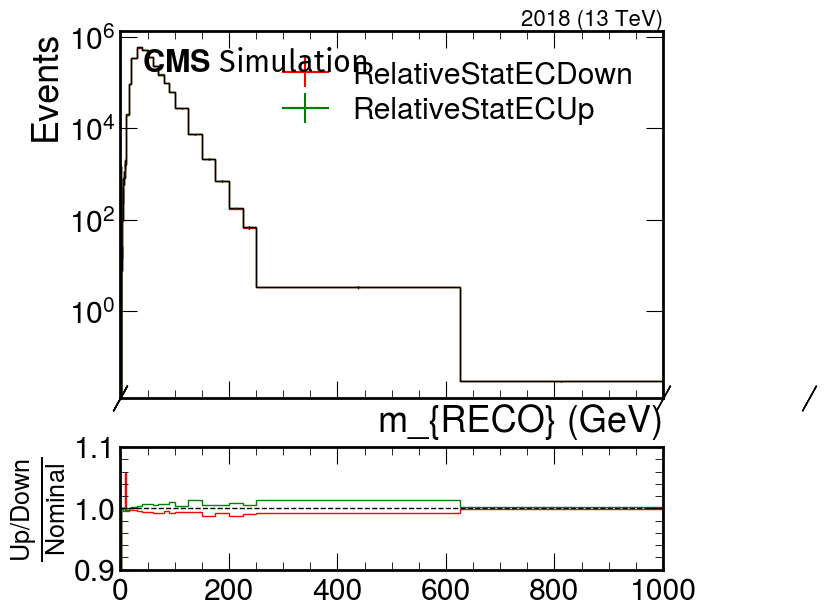

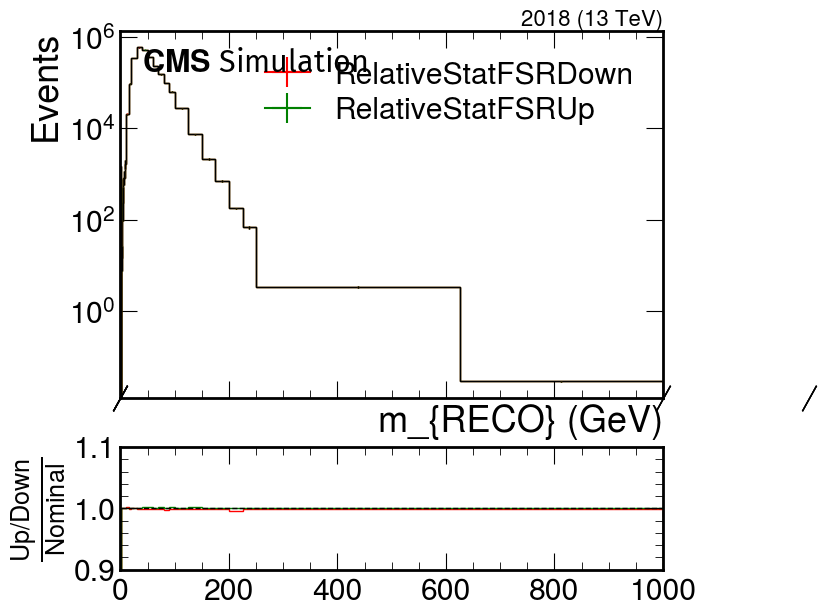

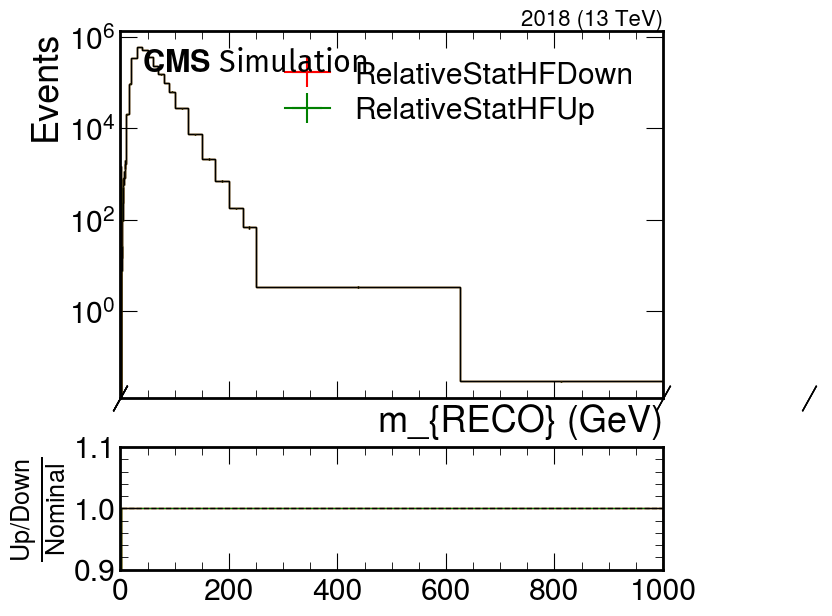

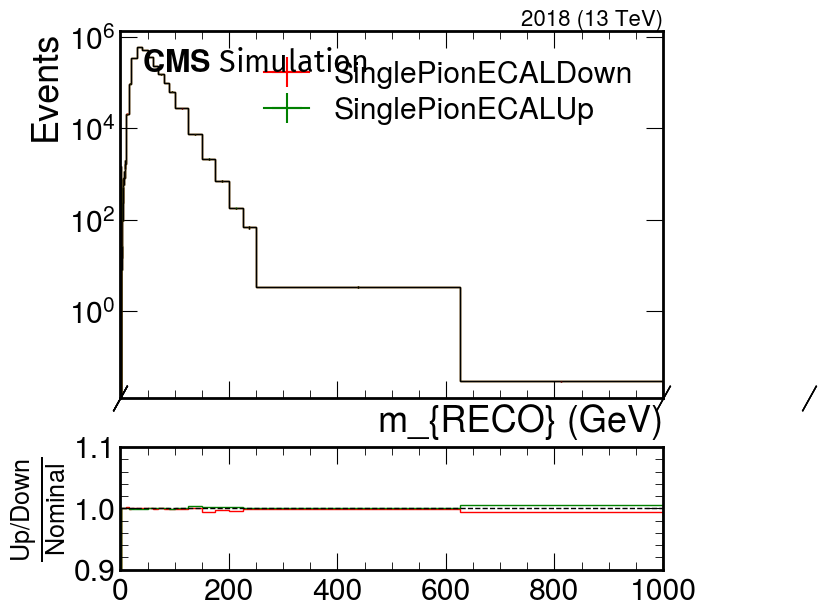

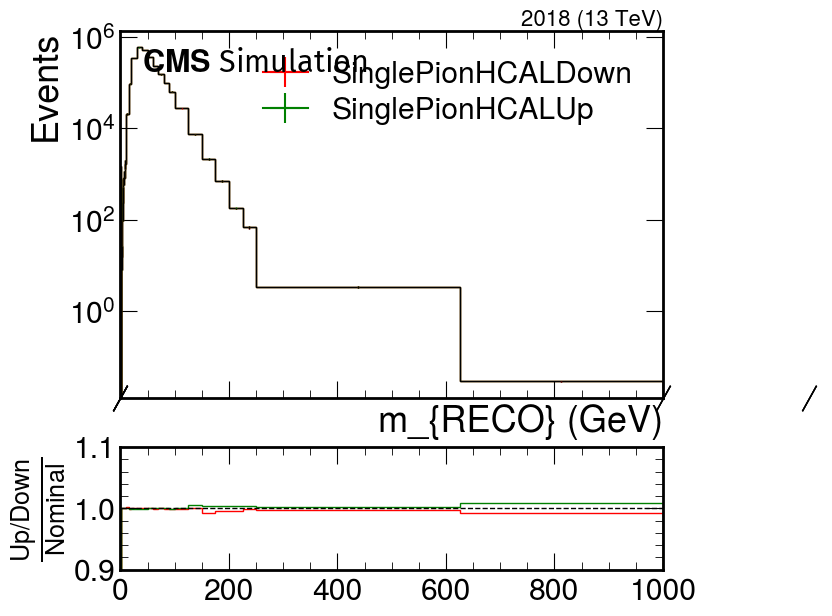

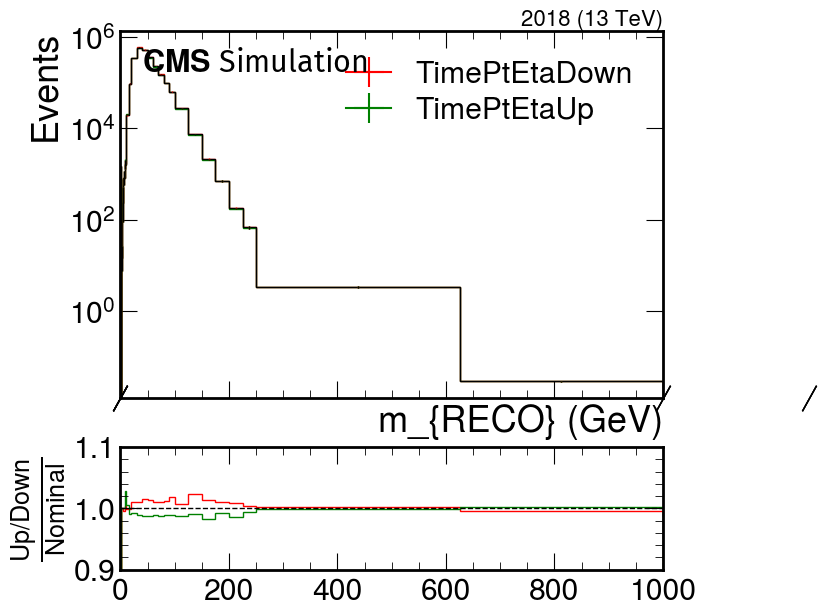

In [10]:
plotSyst(result_mc, "response_matrix_u", 'mreco', label = r'2018 (13 TeV)', IOV='2018', channel='dijet')

In [ ]:
#### Plot dijet systematics
fname = "coffeaOutput/dijet/dijetHists_JetHT_pt200.0_rapidity2.5hemveto2018.pkl"
with open(fname, "rb") as f:
    result_hem = pickle.load( f )
fname = "coffeaOutput/dijet/dijetHists_JetHT_pt200.0_rapidity2.52018.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
histname="ptreco_mreco_u"
availAxes = [ax.name for ax in result_hem[histname].axes]
availSysts = [ax for ax in result_hem[histname].project("syst").axes[0]]
print([ax for ax in result_hem[histname].project("syst").axes[0]])
print("Available axes: ", availAxes)
print("Available systs ", availSysts)
def compareDatasets(result, histname, axVar, syst=None):
    if syst==None:
        syst = "nominal"
    edges = [bin[0] for bin in result[0][histname].project(axVar).axes[0]] + [result[0][histname].project(axVar).axes[0][-1][1]]
    fig, (ax, rax) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
    ratio = np.divide(result[0][histname][{'syst':syst}].project(axVar).values(),result[1][histname][{"syst":"nominal"}].project(axVar).values(),
                                    out=np.empty(np.array(result[1][histname][{"syst":syst}].project(axVar).values()).shape).fill(np.nan),
                                    where=result[1][histname][{"syst":syst}].project(axVar).values()!= 0,)
    hep.histplot(ratio, edges, stack=True, histtype='step', ax=rax, density=False, linestyle ="-", color = 'red', linewidth=1)
    hep.histplot(result[0][histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=1, ax=ax, density=False, linestyle ='-', color = 'red', linewidth=1,label="hemVeto")
    hep.histplot(result[1][histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=1, ax=ax, density=False, linestyle ='-', linewidth=1,label=syst)
    #### Fill ratio plot
    ax.set_xlabel(None)
    ax.autoscale(axis='x', tight=True)
    leg = ax.legend(loc='best', labelspacing=0.25)
    leg.set_visible(True)
    hep.histplot(np.ones_like(ratio), edges, stack=False, histtype='step',ax=rax, density=False, linestyle ="--", color = 'black', linewidth=1)
    rax.set_ylabel(r'$\frac{HEMveto}{Nominal}$', loc = 'center')
    rax.set_ylim(0.9,1.1)
compareDatasets([result_hem, result], 'ptreco_mreco_u', 'mreco')
compareDatasets([result_hem, result], 'ptreco_mreco_u', 'ptreco')

In [5]:
data = [result[histname][{'syst':"nominal"}].project('mreco'), 
                  result[histname][{'syst':"nominal"}].project('mreco'),
         result[histname][{'syst':"nominal"}].project('ptreco'), 
                  result[histname][{'syst':"nominal"}].project('ptreco')]
hemdata = [result_hem[histname][{'syst':"nominal"}].project('mreco'), 
              result_hem[histname][{'syst':"nominal"}].project('mreco'),
     result_hem[histname][{'syst':"nominal"}].project('ptreco'), 
              result_hem[histname][{'syst':"nominal"}].project('ptreco')]
for i, mchist in enumerate(data):
    fig, ax, = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7,7))
    # ax.autoscale(axis='x', tight=True)
    # grid = fig.add_gridspec(4,1, figure=fig, wspace=0, hspace=0)
    num = hemdata[i]
    denom = data[i]
    # main_ax = fig.add_subplot(grid[:-1, :])
    # plt.setp(main_ax.get_xticklabels(), visible=False)
    # main_ax.set_yscale("log")
    # main_ax.set_xlim([0,2200])
    # subplot_ax = fig.add_subplot(grid[-1, :], sharex=main_ax)
    main_ax, sublot_ax = num.plot_ratio(denom,
                                          rp_num_label='hem',
                                          rp_denom_label="nominal",
                                          rp_uncert_draw_type="line",)
                                          # ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax})
    plt.ylabel("HEM/Nominal")
    plt.savefig(os_path+"/compareDataHEM_test.png")

NameError: name 'result' is not defined